# ANALYSIS 2 - MAZE AND RECURSION

### part 2 - recursion problem, helper functions, recursion implementation, solution plotting

This exercise focuses on using recursion to solve a maze. We will first investigate if this is a recursion problem. Then, we identify recursion steps and write pseudocode. To manage recursion better, we proceed with writing helper function. Finally, recursion is implemented and plotted. 

<a id='TOC'></a>
This document contains:
- [Understanding the problem](#understanding)
- [Pseudocode](#pseudocode)
- [Backtracking](#backtracking)
- [maze1 code](#codesofar)
    - [mazes](#mazes)
    - [maze definition and plotting](#defandplot)
- [Helper functions](#helpers)
    - [new_path()](#newpath)
    - [in_maze()](#inmaze)
    - [is_goal()](#isgoal)
    - [get_neighbours()](#getneighbours)
- [Implementing recursion](#recursion)
- [Solution plotting](#plotting)
- [Final exercise](#final)
- [Recursion limit (extra)](#limit)



<a id='understanding'></a>
## Recursion - understanding the problem

Solving a maze (finding path from start to goal) is a nice example to visualise how recursion works. The first thing to do is to consider if a problem is suitable to be solved recursively. As we know, **recursion** *is a method of problem solving, where the solution depends on smaller instances of the same problem*.

Let's consider our maze m11. The path from **start (0,0)** to **goal (11,5)** is represented with the red line.

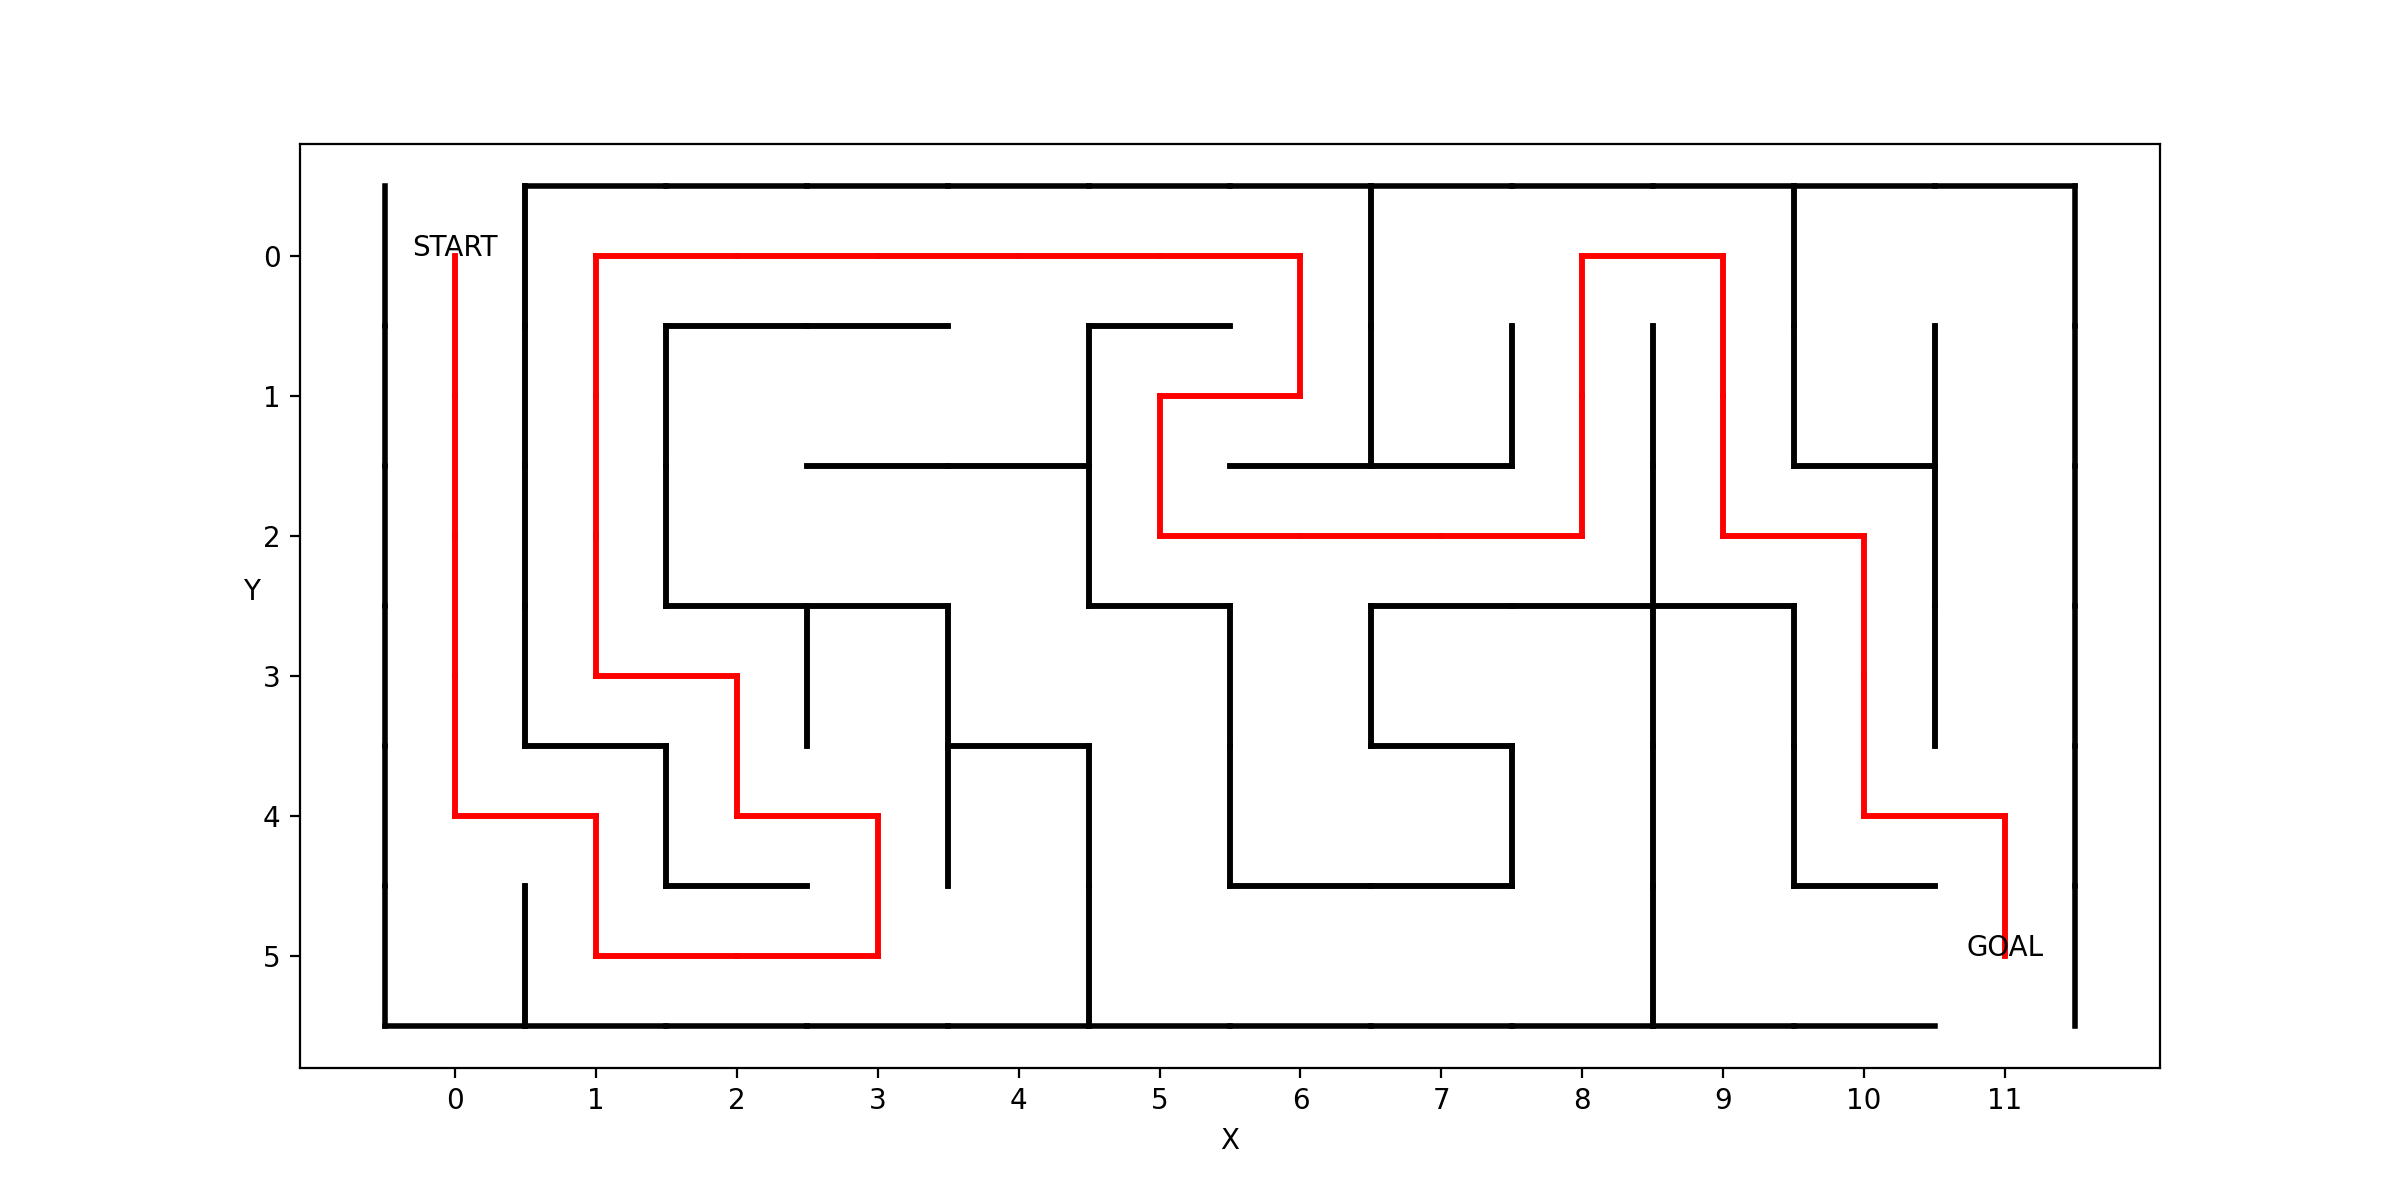</img>

Next, let's consider a point on the path, **P (4,0)**. If we can reach from **start (0,0)** to **P (4,0)**, then the remaining part to be solved is to find a path from **P (4,0)** to **goal (11,5)**

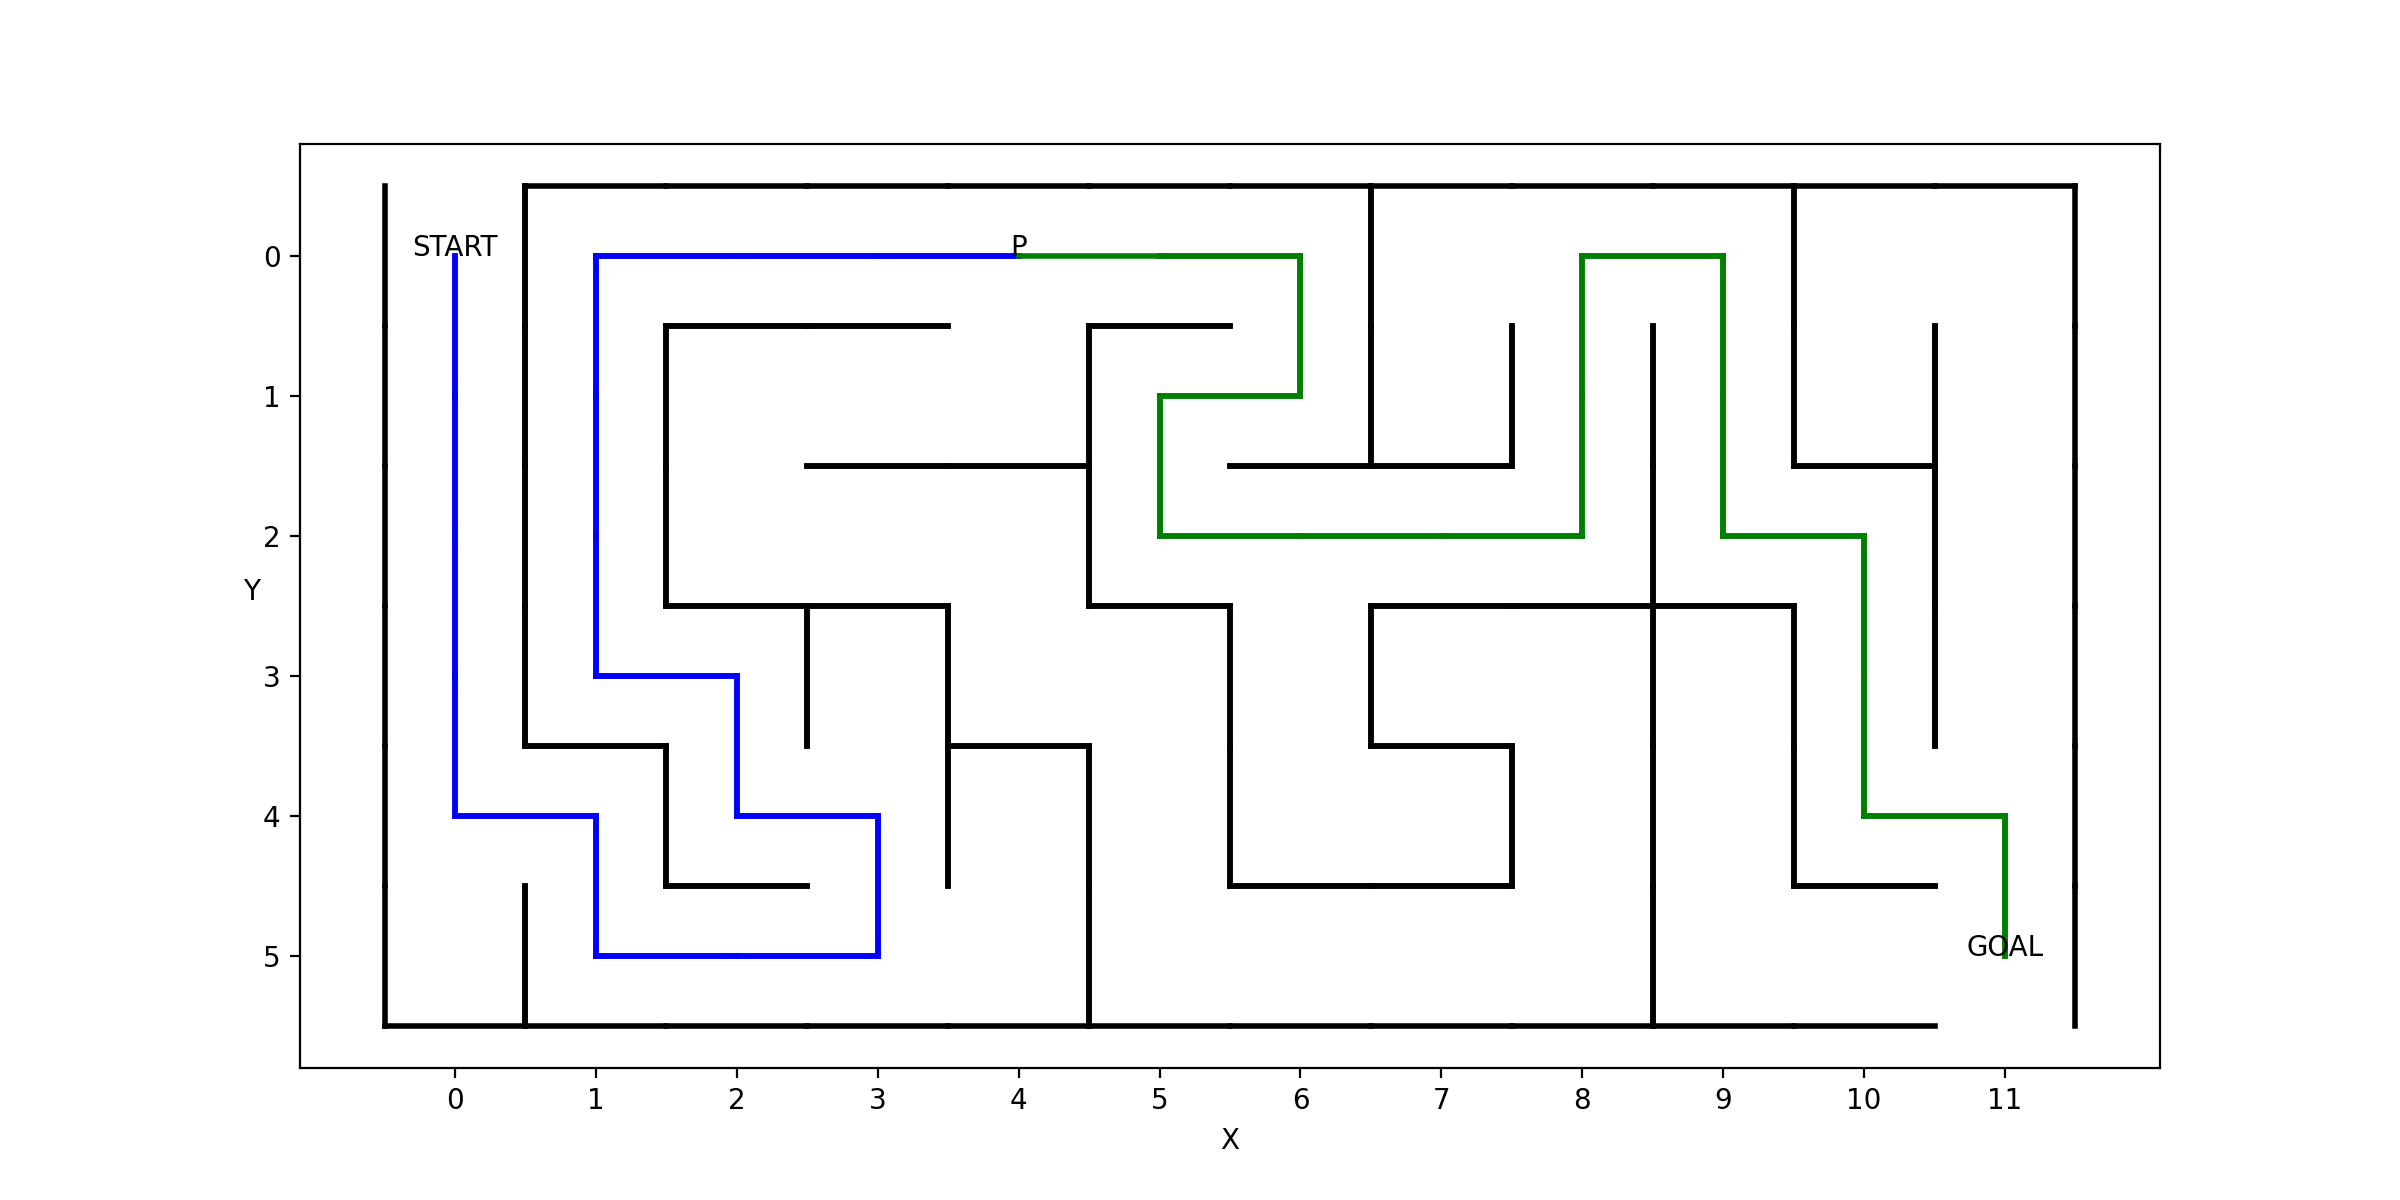</img>

We can continue and identify other points on sub-paths and continue dividing them. In this way, the path search from **start (0,0)** to **goal (11,5)** is the sum of path searches for these sub-paths:
- **start (0,0)** - A (0,4)
-     A (0,4) - B (3,5)
-     B (3,5) - C (3,4)
-     C (3,4) - **P (4,0)**

-     **P (4,0)** - M (6,2)
-     M (6,2) - N (8,0)
-     N (8,0) - O (11,4)
-     O (11,4) - **goal (11,5)**

Thus, we conclude that this is a clear recursion problem.

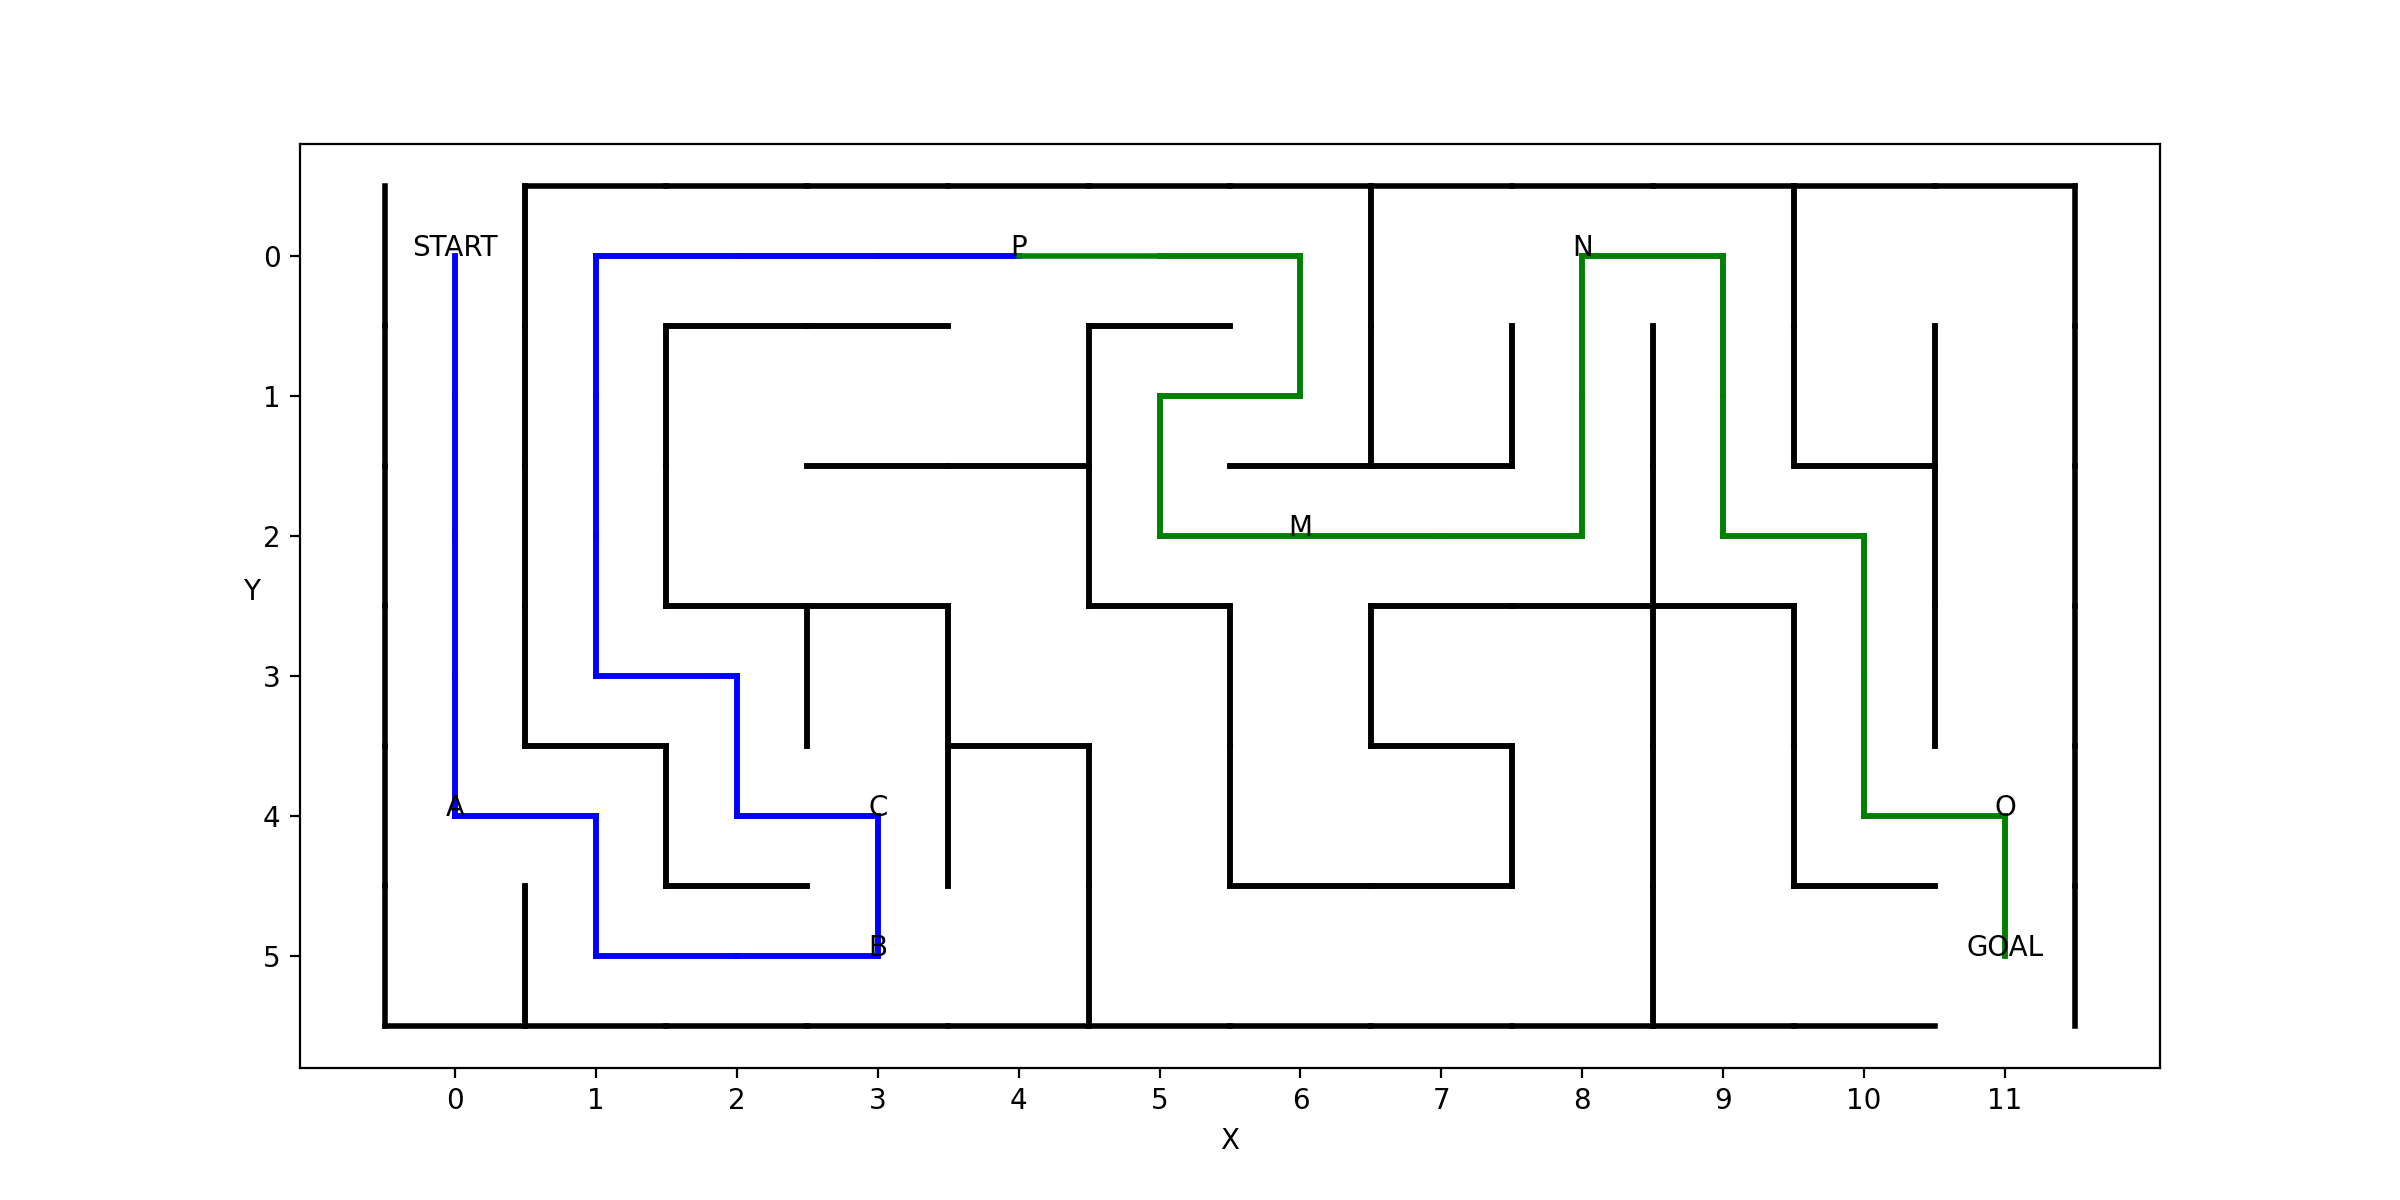</img>

<a id='pseudocode'></a>
## Pseudocode

Once we identified that this problem can be solved recursively, let's sketch a pseudocode for this recursion. As we know, every **recursion** consists of: 
1. ***stopping criteria***, and 
2. ***recursive call***.

Let's name this recursive function **find_path(x,y)**, where x,y are the starting coordinates. For such function, ***recursive call*** involves trying to find a path from all four adjacent cells (we will optimize this later):
- find_path(x+1,&nbsp;&nbsp;y)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# right
- find_path(x-1,&nbsp;&nbsp;y)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# left
- find_path(x,&nbsp;&nbsp;y+1)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# down
- find_path(x,&nbsp;&nbsp;y-1)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# up

Function **find_path(x,y)** should ***stop*** if one of the following ***criteria*** is met:
- (x,y) is outside of maze,
- (x,y) was already visited,
- (x,y) is the goal (end is reached),
- path reached a dead-end (there are no other neighbouring cells to visit).

There are several variations how to implement this and some approaches are better optimized than the others. The pseudo-code we give below, is selected for its clarity over performance.

0. `mark all cells as OPEN`

### find_path(x,y) - pseudocode

1. `if (x,y outside maze) return False`
2. `if (x,y not OPEN) return False`
3. `mark x,y as VISITED` (potentially a part of solution path)
4. `if (x,y is goal) return True`
5. `list all connected cells`
6. `for each cell in connected cells:`
7. &nbsp;&nbsp;&nbsp;&nbsp;`if (call find-path(cell(x,y)) is True) return True`
8. `mark x,y as CLOSED` (x,y is a dead-end, hence, unmark it as part of solution path)
9. `return False`

<a id='backtracking'></a>
## Backtracking

In the pseudocode above, **backtracking** is used to find a path. **Backtracking** is an algorithm that solves a problem by building a solution list (recursively), and then removing those items that failed to satisfy a given criteria.

What our pseudocode will do is try to find a path to the goal from given (x,y). If it is not the goal, it will mark that cell as VISITED, and then try the next available (connected). By doing so, it will mark all (x,y)s it tests as VISITED. However, while exploring, we don't know which (x,y) leads to the path, so all are initially labeled as VISITED. But, once a stopping criteria is met, and that wasn't the goal, the algorithm knows that that solutions is a dead-end, hence, it will mark it as CLOSED, effectively removing it from a solution list. Then, it will return that information (line 9. `return False`) to the recursive function that called it, and the process will be repeated. If that function also exhausted all option, its (x,y) coordinate will be marked as closed and so on, moving upwards in the recursive tree. This part is **backtracking**.

To help visualize the problem, we will mark the cells as following:
```
OPEN    = '.'
VISITED = '+'
CLOSED  = 'x'
```
The image below shows the recursion and backtracking in action for `maze = m13`.

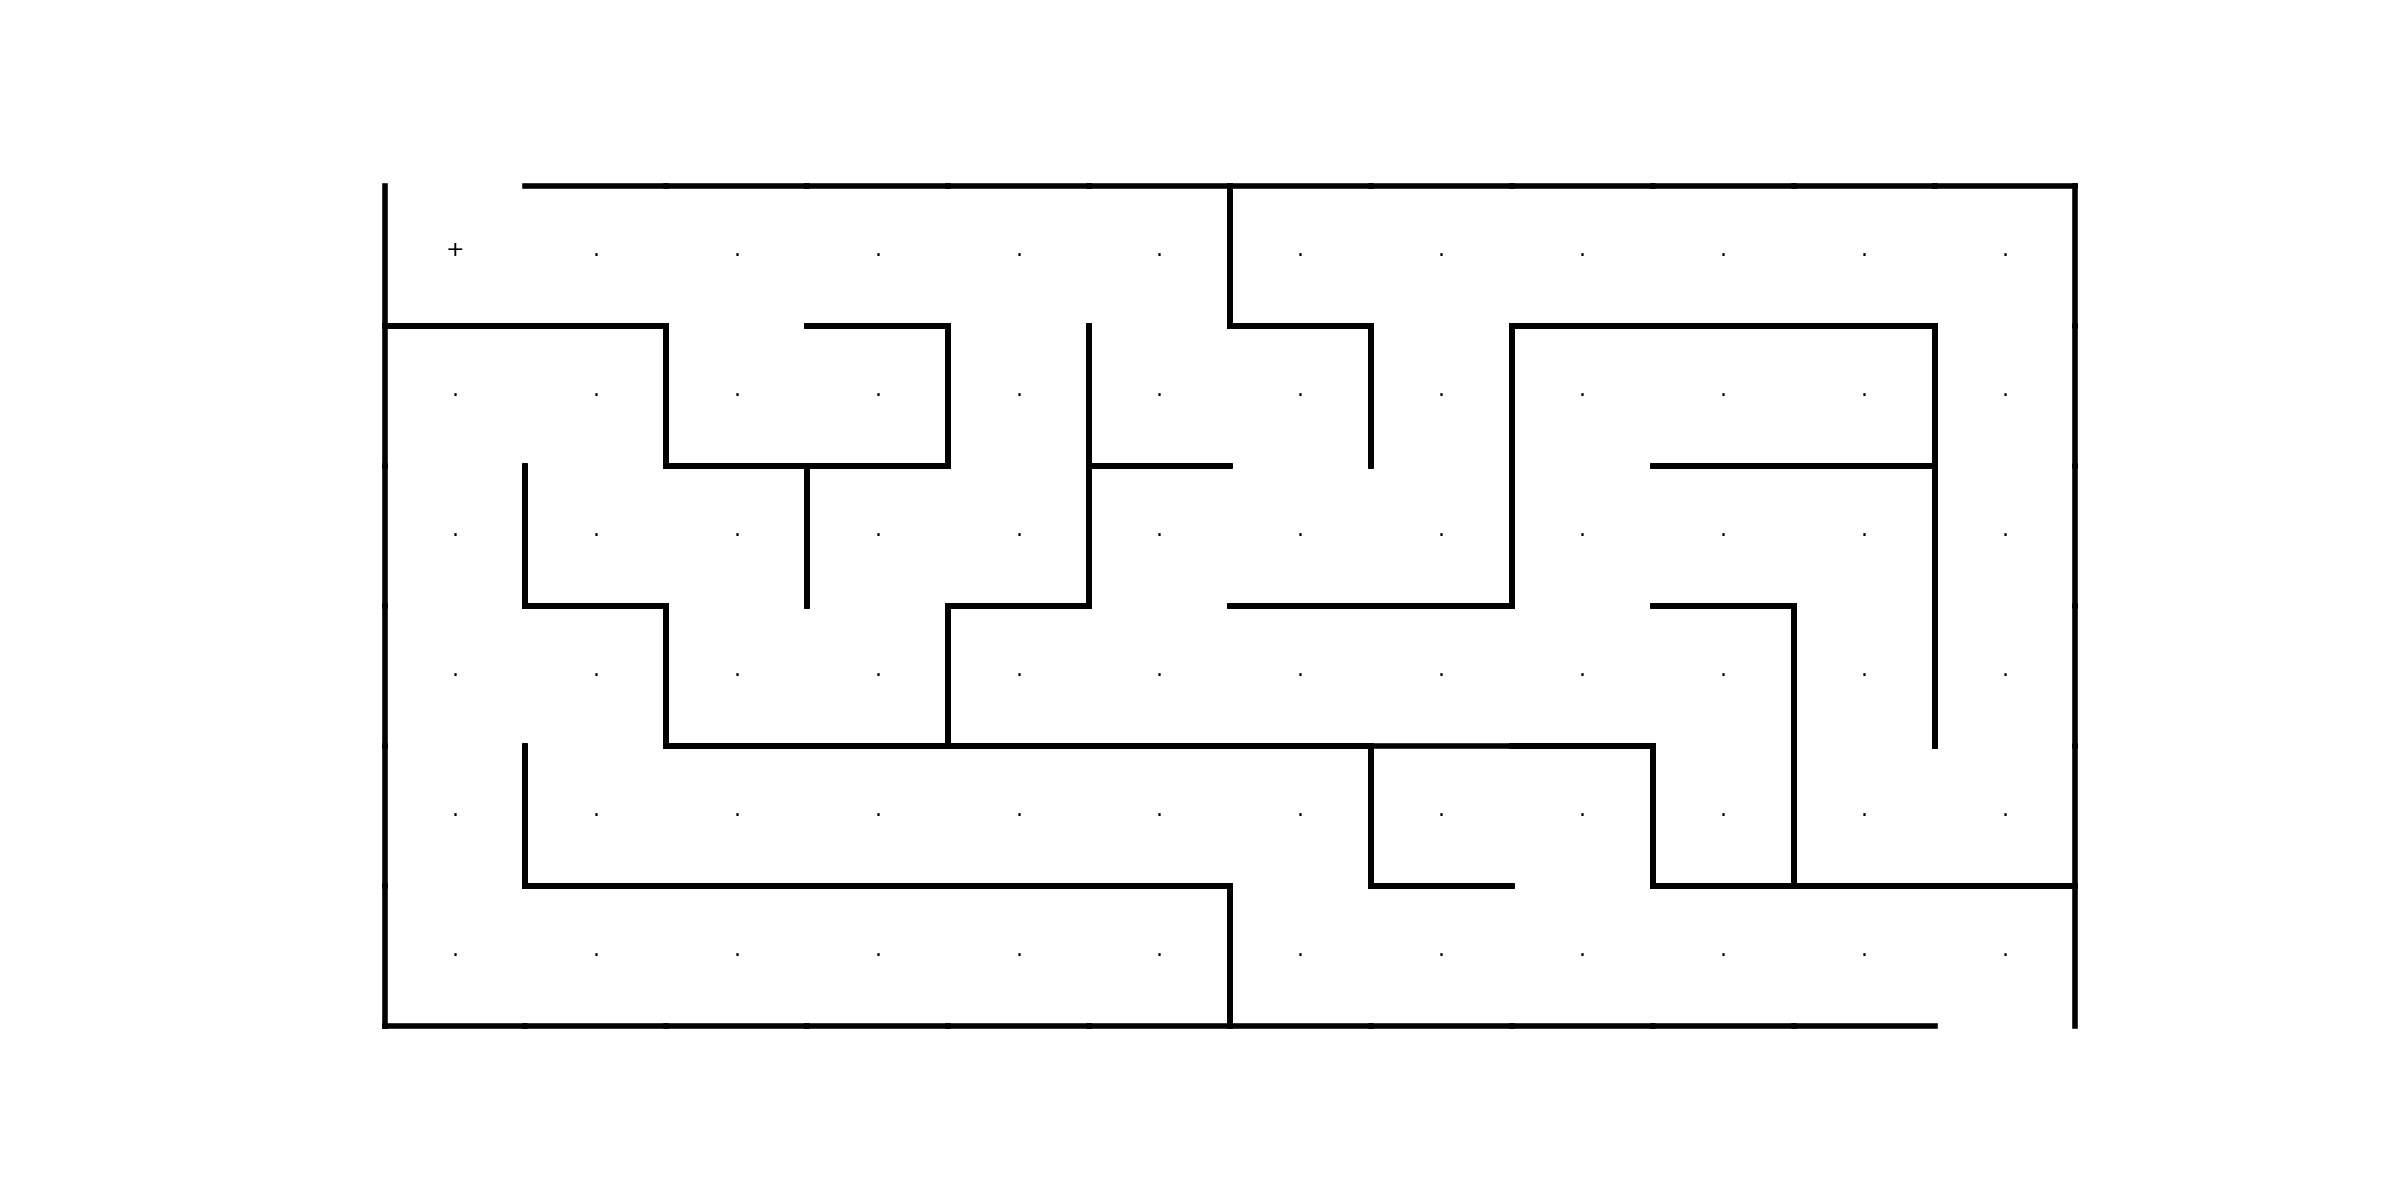

[Back to the table of contents](#TOC)

<a id='codesofar'></a>
## The code so far - data structure, plotting and utility functions

In reader `maze1.ipynb` we defined a data structure for our maze, as well as utility and plotting function. To have everything in one place, they will be repeated here.

<a id='mazes'></a>
### Mazes

In [ ]:
## 6x3 mazes
m01 = [[10, 6, 5, 5, 5, 3], [10, 12, 7, 1, 6, 11], [12, 5, 9, 4, 9, 10]]
m02 = [[14, 3, 6, 7, 3, 2], [10, 10, 10, 10, 12, 11], [8, 12, 9, 8, 4, 11]]
m03 = [[10, 6, 5, 5, 5, 3], [14, 9, 2, 6, 3, 10], [12, 5, 9, 8, 12, 11]]
m04 = [[14, 5, 5, 3, 6, 3], [10, 4, 3, 12, 9, 10], [12, 5, 9, 4, 5, 11]]

## 12x6 mazes
m11 = [[10, 6, 5, 5, 7, 5, 3, 6, 7, 3, 6, 3], [10, 10, 6, 5, 9, 6, 9, 8, 10, 10, 8, 10], 
       [10, 10, 12, 5, 3, 12, 7, 5, 9, 12, 3, 10], [10, 12, 3, 2, 12, 3, 10, 4, 3, 2, 10, 10], 
       [14, 3, 12, 11, 2, 10, 12, 1, 10, 10, 12, 11], [8, 12, 5, 13, 9, 12, 5, 5, 9, 12, 5, 11]]
m12 = [[10, 6, 7, 1, 6, 5, 5, 5, 5, 3, 4, 3], [14, 9, 12, 3, 12, 3, 2, 6, 5, 9, 6, 9], 
       [12, 5, 3, 12, 3, 12, 11, 10, 6, 1, 14, 3], [2, 6, 9, 6, 13, 1, 10, 8, 12, 5, 9, 10], 
       [10, 10, 6, 9, 6, 3, 10, 4, 7, 5, 3, 10], [12, 9, 12, 5, 9, 12, 13, 5, 9, 4, 13, 11]]
m13 = [[12, 5, 7, 5, 7, 3, 4, 7, 5, 5, 5, 3], [6, 3, 12, 1, 10, 12, 3, 10, 6, 5, 1, 10], 
       [10, 12, 3, 6, 9, 6, 13, 9, 14, 5, 3, 10], [14, 3, 12, 9, 4, 13, 5, 5, 13, 3, 10, 10], 
       [10, 12, 5, 5, 5, 5, 3, 12, 3, 8, 12, 9], [12, 5, 5, 5, 5, 1, 12, 5, 13, 5, 5, 3]]
m14 = [[14, 5, 3, 4, 5, 3, 6, 5, 3, 6, 7, 3], [12, 3, 12, 5, 3, 10, 10, 6, 9, 8, 10, 10], 
       [6, 9, 2, 6, 9, 14, 11, 10, 6, 5, 9, 10], [12, 3, 10, 10, 6, 11, 10, 8, 10, 6, 5, 9], 
       [6, 9, 12, 13, 9, 8, 12, 5, 9, 12, 5, 3], [12, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 11]]

## 20x10 mazes
m21 = [[14, 5, 5, 3, 2, 6, 5, 5, 3, 6, 5, 3, 4, 5, 5, 7, 5, 5, 5, 3], 
       [14, 3, 4, 13, 9, 12, 7, 1, 10, 10, 2, 10, 6, 5, 3, 10, 6, 3, 6, 9], 
       [10, 12, 5, 5, 5, 5, 9, 6, 9, 10, 14, 9, 12, 3, 10, 12, 9, 8, 12, 3], 
       [10, 4, 5, 7, 5, 3, 2, 8, 4, 11, 10, 6, 5, 9, 12, 5, 5, 5, 5, 11], 
       [12, 3, 6, 9, 2, 12, 11, 6, 5, 9, 12, 9, 4, 7, 5, 5, 5, 7, 3, 10], 
       [6, 9, 10, 6, 13, 3, 10, 14, 5, 5, 5, 5, 3, 10, 4, 3, 6, 9, 8, 10], 
       [10, 6, 9, 12, 3, 10, 10, 12, 3, 2, 6, 3, 10, 12, 5, 11, 12, 5, 5, 9], 
       [10, 10, 6, 7, 11, 8, 12, 3, 12, 9, 10, 12, 9, 6, 3, 12, 3, 4, 7, 1], 
       [12, 9, 10, 10, 8, 6, 3, 12, 3, 6, 9, 2, 6, 9, 12, 3, 12, 3, 12, 3], 
       [4, 5, 9, 12, 5, 9, 12, 5, 13, 9, 4, 13, 13, 5, 1, 12, 5, 13, 5, 11]]

m22 = [[14, 5, 5, 1, 6, 5, 5, 3, 4, 7, 3, 6, 3, 4, 7, 3, 6, 5, 5, 3], 
       [14, 5, 5, 3, 10, 6, 3, 10, 6, 9, 12, 9, 10, 6, 9, 10, 10, 6, 3, 10], 
       [10, 2, 6, 11, 12, 9, 10, 10, 14, 5, 3, 4, 13, 9, 6, 9, 12, 9, 10, 10], 
       [12, 11, 10, 10, 6, 3, 10, 8, 14, 1, 12, 5, 7, 3, 12, 3, 4, 3, 10, 10], 
       [2, 10, 10, 8, 10, 10, 12, 3, 8, 6, 5, 3, 10, 12, 3, 12, 3, 12, 9, 10], 
       [10, 10, 12, 5, 9, 12, 3, 12, 5, 9, 2, 10, 12, 1, 10, 2, 10, 6, 5, 11], 
       [14, 9, 4, 5, 5, 3, 12, 7, 5, 5, 11, 12, 5, 5, 9, 10, 10, 10, 6, 9], 
       [10, 4, 7, 5, 5, 13, 3, 10, 6, 3, 8, 6, 3, 6, 5, 11, 10, 10, 12, 3], 
       [12, 3, 10, 6, 3, 6, 9, 10, 10, 10, 6, 9, 10, 10, 2, 12, 9, 12, 3, 10], 
       [4, 13, 9, 8, 12, 13, 1, 12, 9, 12, 13, 1, 12, 13, 13, 5, 5, 5, 9, 10]]

m23 = [[10, 6, 3, 4, 5, 7, 5, 1, 6, 5, 5, 7, 5, 3, 4, 5, 5, 7, 5, 3], 
       [14, 9, 10, 6, 3, 12, 7, 5, 9, 4, 3, 10, 4, 11, 6, 5, 3, 10, 2, 10], 
       [10, 2, 12, 9, 12, 3, 12, 5, 5, 7, 9, 12, 3, 10, 10, 2, 12, 9, 14, 9], 
       [10, 10, 6, 7, 1, 12, 5, 1, 4, 9, 6, 5, 9, 12, 9, 14, 5, 3, 10, 2], 
       [10, 12, 9, 14, 5, 5, 5, 7, 5, 3, 12, 3, 6, 5, 3, 10, 2, 12, 9, 10], 
       [12, 5, 3, 12, 3, 6, 3, 12, 3, 12, 5, 9, 14, 1, 10, 12, 11, 4, 5, 11], 
       [6, 3, 10, 6, 9, 8, 10, 6, 9, 2, 6, 5, 9, 6, 15, 1, 10, 6, 3, 10], 
       [10, 8, 10, 12, 5, 5, 9, 10, 4, 11, 10, 6, 5, 9, 10, 6, 9, 10, 12, 11], 
       [10, 6, 9, 6, 5, 5, 3, 12, 3, 14, 9, 10, 4, 5, 9, 10, 4, 13, 3, 10], 
       [12, 13, 5, 9, 4, 5, 13, 5, 9, 12, 1, 12, 5, 5, 5, 13, 5, 5, 9, 10]]

m24 = [[14, 7, 1, 6, 5, 3, 6, 5, 3, 6, 5, 7, 5, 5, 5, 5, 3, 6, 5, 3], 
       [10, 12, 5, 9, 2, 10, 10, 6, 9, 10, 2, 12, 3, 6, 5, 1, 12, 9, 6, 9], 
       [12, 5, 5, 3, 10, 10, 10, 12, 3, 12, 9, 6, 9, 10, 6, 3, 6, 5, 9, 2], 
       [6, 3, 6, 13, 9, 10, 10, 2, 12, 5, 5, 9, 2, 14, 9, 12, 9, 4, 5, 11], 
       [10, 12, 9, 2, 6, 9, 12, 9, 6, 5, 5, 7, 9, 12, 5, 3, 6, 5, 5, 11], 
       [10, 6, 3, 10, 12, 3, 6, 3, 14, 5, 1, 14, 7, 3, 2, 10, 12, 3, 2, 10], 
       [12, 9, 12, 11, 2, 12, 9, 12, 9, 6, 3, 8, 10, 14, 9, 12, 5, 9, 14, 9], 
       [6, 5, 5, 9, 14, 5, 5, 3, 6, 9, 12, 5, 9, 10, 6, 3, 6, 3, 12, 3], 
       [12, 5, 5, 3, 8, 6, 5, 11, 12, 5, 5, 5, 3, 8, 10, 10, 10, 12, 3, 10], 
       [4, 5, 5, 13, 5, 9, 4, 13, 5, 5, 5, 1, 12, 5, 9, 12, 13, 1, 12, 11]]

m25 = [[14, 5, 1, 6, 7, 5, 5, 5, 5, 5, 1, 6, 7, 5, 5, 3, 6, 5, 3, 2], 
       [10, 6, 5, 9, 12, 3, 6, 3, 6, 5, 5, 9, 10, 6, 3, 10, 12, 3, 10, 10], 
       [14, 9, 4, 7, 1, 12, 9, 12, 13, 5, 3, 6, 9, 8, 10, 12, 5, 9, 12, 11], 
       [12, 5, 7, 9, 6, 5, 5, 1, 6, 5, 9, 12, 7, 3, 14, 7, 5, 5, 3, 10], 
       [4, 3, 10, 6, 9, 6, 3, 4, 9, 6, 5, 3, 10, 10, 8, 14, 3, 4, 9, 10], 
       [6, 11, 10, 12, 5, 9, 12, 5, 3, 10, 2, 10, 8, 12, 3, 8, 12, 5, 5, 9], 
       [10, 8, 12, 3, 6, 5, 3, 2, 12, 9, 14, 9, 6, 3, 10, 6, 3, 6, 5, 3], 
       [14, 5, 3, 10, 10, 6, 9, 12, 5, 3, 10, 4, 11, 10, 12, 9, 10, 10, 2, 10], 
       [10, 6, 9, 10, 10, 12, 3, 6, 3, 10, 12, 5, 9, 12, 5, 3, 12, 13, 9, 10], 
       [8, 12, 5, 13, 9, 4, 13, 9, 12, 13, 5, 5, 5, 5, 1, 12, 5, 5, 5, 11]]

## 40x20 mazes
m31 = [[12, 5, 7, 3, 6, 5, 5, 5, 5, 5, 3, 6, 3, 2, 6, 5, 3, 6, 5, 5, 5, 7, 1, 6, 5, 5, 7, 5, 3, 4, 3, 6, 7, 3, 6, 5, 1, 6, 5, 3], 
       [6, 5, 9, 12, 9, 6, 5, 5, 5, 3, 10, 10, 10, 12, 13, 3, 12, 9, 4, 5, 3, 12, 5, 9, 6, 3, 12, 3, 12, 3, 12, 9, 10, 12,9, 6, 5, 9, 6, 9], 
       [10, 6, 5, 5, 3, 10, 6, 5, 5, 9, 12, 9, 12, 5, 3, 12, 5, 5, 5, 3, 14, 3, 6, 7, 9, 12, 1, 10, 4, 11, 6, 3, 12, 7, 5, 9, 6, 3, 12, 3],
       [10, 10, 6, 3, 12, 9, 10, 4, 3, 6, 5, 5, 7, 3, 12, 5, 3, 2, 6, 9, 10, 10, 10, 12, 5, 5, 3, 12, 3, 12, 9, 12, 3, 12, 5, 5, 9, 10, 6, 9], 
       [10, 12, 9, 10, 6, 1, 12, 5, 9, 12, 1, 6, 9, 12, 3, 2, 10, 10, 10, 4, 9, 12, 9, 6, 5, 5, 9, 6, 9, 6, 3, 2, 12, 5, 5, 5, 3, 8, 12, 3], 
       [14, 5, 1, 10, 14, 5, 7, 3, 4, 7, 5, 9, 6, 5, 13, 9, 10, 14, 13, 5, 5, 5, 5, 9, 6, 5, 5, 9, 6, 9, 12, 9, 6, 5, 5, 5, 9, 6, 5, 11], 
       [10, 6, 3, 10, 10, 2, 10, 10, 6, 9, 4, 5, 13, 1, 6, 5, 9, 10, 6, 5, 5, 5, 3, 6, 9, 2, 6, 5, 11, 6, 5, 5, 9, 6, 3, 6, 5, 9, 2, 10], 
       [10, 10, 10, 10, 10, 10, 10, 12, 11, 6, 5, 5, 5, 5, 9, 4, 5, 9, 14, 3, 2, 6, 9, 10, 2, 14, 9, 6, 9, 12, 3, 4, 7, 9,10, 10, 2, 6, 13, 9], 
       [10, 10, 10, 10, 10, 10, 12, 3, 10, 10, 6, 5, 5, 5, 5, 3, 6, 3, 8, 10, 10, 12, 5, 9, 14, 9, 2, 12, 5, 5, 13, 5, 9, 2, 12, 9, 14, 9, 4, 3],
       [12, 9, 12, 9, 12, 13, 1, 10, 10, 10, 12, 3, 6, 5, 3, 12, 9, 10, 6, 11, 12, 5, 7, 5, 13, 5, 13, 3, 6, 5, 5, 5, 3, 14, 7, 1, 12, 5, 5, 11], 
       [6, 1, 6, 5, 7, 5, 5, 9, 8, 12, 3, 10, 10, 2, 10, 6, 3, 12, 9, 10, 6, 3, 8, 6, 5, 3, 4, 9, 12, 3, 2, 6, 9, 10, 12, 3, 6, 7, 1, 10], 
       [10, 6, 9, 2, 12, 3, 6, 5, 5, 5, 9, 12, 13, 9, 10, 8, 12, 5, 5, 9, 10, 12, 5, 9, 2, 12, 5, 5, 3, 12, 11, 10, 4, 11, 2, 12, 9, 12, 3, 10], 
       [14, 9, 6, 13, 3, 10, 10, 2, 6, 5, 5, 7, 5, 3, 12, 3, 6, 5, 5, 5, 11, 4, 7, 5, 11, 6, 5, 7, 9, 6, 9, 12, 3, 12, 13, 5, 5, 3, 12, 9], 
       [10, 4, 13, 1, 10, 12, 9, 10, 10, 6, 3, 10, 2, 12, 3, 14, 9, 6, 5, 3, 10, 6, 9, 2, 10, 10, 2, 10, 6, 9, 2, 6, 9, 4, 7, 7, 1, 10, 6, 1], 
       [12, 3, 6, 5, 9, 6, 5, 13, 9, 10, 12, 9, 14, 5, 9, 12, 1, 12, 3, 10, 12, 11, 4, 13, 9, 10, 12, 9, 12, 7, 9, 10, 6, 5, 9, 10, 6, 9, 12, 3], 
       [2, 10, 12, 3, 6, 13, 5, 5, 1, 14, 3, 2, 14, 5, 5, 5, 5, 3, 10, 10, 4, 9, 6, 5, 3, 12, 3, 6, 5, 9, 6, 9, 10, 6, 5, 9, 12, 5, 3, 10], 
       [10, 12, 3, 12, 13, 3, 6, 5, 3, 8, 10, 12, 9, 6, 5, 5, 3, 12, 9, 10, 6, 5, 9, 2, 12, 3, 14, 13, 5, 1, 10, 6, 9, 12, 5, 1, 6, 3, 12, 11], 
       [14, 3, 12, 3, 4, 11, 10, 2, 12, 3, 12, 5, 5, 13, 5, 1, 10, 4, 7, 9, 14, 3, 6, 15, 1, 10, 8, 6, 3, 6, 9, 10, 6, 5, 5, 5, 9, 12, 3, 10], 
       [10, 14, 1, 12, 3, 8, 10, 10, 6, 9, 6, 5, 5, 5, 5, 3, 12, 3, 12, 3, 8, 10, 10, 8, 6, 9, 6, 9, 10, 10, 6, 9, 10, 4, 5, 3, 6, 5, 9, 10],
       [8, 12, 5, 5, 13, 5, 9, 12, 13, 5, 9, 4, 5, 5, 5, 13, 5, 9, 4, 13, 5, 9, 12, 5, 13, 5, 9, 4, 13, 9, 12, 5, 13, 5, 5, 9, 12, 5, 5, 11]]

m32 = [[14, 5, 5, 7, 7, 5, 5, 5, 3, 6, 1, 6, 3, 6, 5, 5, 5, 7, 5, 1, 6, 3, 6, 5, 5, 3, 6, 7, 1, 6, 7, 5, 5, 5, 5, 5, 5, 5, 3, 2],
       [10, 6, 5, 9, 10, 6, 5, 3, 10, 12, 5, 9, 14, 9, 2, 6, 3, 12, 5, 5, 9, 12, 9, 6, 3, 14, 9, 12, 5, 9, 12, 3, 6, 3, 4, 7, 5, 5, 9, 10],
       [10, 12, 5, 3, 8, 12, 3, 10, 10, 6, 5, 3, 12, 5, 11, 10, 10, 6, 3, 6, 5, 5, 5, 9, 10, 12, 5, 3, 6, 5, 5, 9, 10, 12, 3, 10, 4, 5, 5, 11],
       [12, 5, 1, 12, 3, 6, 9, 8, 12, 9, 2, 12, 3, 4, 9, 10, 12, 9, 12, 9, 4, 5, 3, 6, 9, 4, 3, 10, 12, 5, 5, 5, 9, 6, 9, 12, 5, 5, 3, 10],
       [6, 5, 5, 5, 9, 10, 6, 3, 6, 7, 11, 2, 12, 5, 3, 12, 3, 6, 5, 5, 7, 5, 9, 12, 5, 3, 14, 9, 6, 3, 6, 5, 5, 9, 6, 5, 5, 1, 12, 11],
       [12, 3, 6, 5, 3, 10, 10, 10, 10, 10, 10, 14, 7, 1, 12, 5, 9, 10, 6, 3, 12, 5, 7, 5, 3, 10, 10, 6, 9, 10, 10, 6, 3, 6, 11, 6, 5, 5, 3, 10],
       [6, 9, 12, 3, 12, 9, 10, 12, 9, 10, 10, 8, 12, 7, 3, 6, 3, 10, 10, 12, 7, 1, 10, 6, 9, 10, 12, 9, 2, 10, 10, 10, 12, 9, 10, 10, 6, 3, 12, 9],
       [12, 7, 1, 10, 2, 6, 9, 6, 5, 9, 10, 6, 3, 8, 10, 10, 10, 10, 12, 3, 12, 3, 10, 12, 3, 10, 4, 5, 13, 9, 10, 10, 4, 3, 10, 10, 8, 14, 7, 3],
       [6, 9, 6, 9, 12, 13, 3, 12, 3, 4, 13, 9, 12, 3, 12, 11, 10, 12, 3, 8, 6, 11, 10, 2, 10, 12, 5, 5, 5, 3, 10, 10, 6, 11, 10, 12, 3, 10, 10, 10],
       [12, 5, 9, 6, 5, 3, 14, 1, 12, 5, 3, 4, 5, 13, 3, 8, 12, 3, 12, 3, 10, 10, 10, 12, 13, 3, 6, 5, 3, 10, 10, 12, 9, 10, 12, 3, 10, 10, 10, 8],
       [2, 6, 7, 9, 2, 10, 8, 6, 3, 6, 9, 6, 5, 3, 12, 5, 5, 11, 6, 9, 10, 8, 10, 6, 3, 8, 12, 3, 10, 10, 10, 6, 3, 8, 6, 11, 10, 10, 12, 3],
       [12, 9, 10, 4, 13, 13, 5, 9, 10, 12, 5, 13, 1, 10, 6, 3, 4, 11, 10, 4, 15, 3, 10, 10, 12, 5, 5, 9, 10, 12, 9, 10, 12, 5, 9, 10, 10, 8, 6, 9],
       [6, 3, 12, 3, 6, 3, 4, 7, 13, 5, 5, 5, 5, 9, 10, 12, 3, 8, 12, 3, 8, 10, 12, 13, 5, 1, 6, 3, 12, 7, 5, 9, 6, 5, 5, 9, 12, 3, 12, 3],
       [10, 14, 5, 9, 10, 12, 3, 10, 6, 5, 5, 3, 6, 5, 9, 2, 12, 7, 1, 12, 5, 11, 6, 5, 5, 5, 9, 12, 3, 12, 3, 6, 9, 6, 3, 6, 3, 12, 3, 10],
       [10, 10, 6, 5, 13, 1, 10, 8, 12, 5, 3, 10, 10, 6, 5, 13, 3, 12, 5, 3, 6, 9, 12, 5, 5, 3, 6, 3, 12, 3, 10, 10, 6, 9, 12, 9, 12, 5, 9, 10],
       [10, 10, 12, 3, 2, 6, 9, 6, 3, 6, 9, 10, 10, 14, 3, 2, 12, 3, 2, 12, 9, 6, 1, 6, 3, 12, 9, 10, 6, 13, 9, 10, 10, 6, 7, 7, 5, 5, 5, 9],
       [10, 12, 1, 12, 11, 10, 6, 9, 10, 10, 2, 12, 9, 8, 10, 12, 3, 10, 14, 5, 3, 12, 5, 9, 12, 7, 3, 10, 10, 6, 3, 10, 10, 8, 10, 8, 6, 3, 6, 3],
       [14, 5, 5, 5, 9, 10, 10, 6, 11, 10, 12, 5, 7, 3, 14, 3, 10, 10, 14, 3, 10, 6, 5, 5, 5, 9, 10, 10, 8, 10, 10, 8, 12, 3, 12, 5, 9, 12, 9, 10],
       [10, 6, 3, 6, 3, 10, 10, 10, 8, 12, 3, 6, 9, 10, 8, 10, 14, 9, 8, 10, 10, 10, 6, 3, 6, 5, 9, 12, 3, 10, 10, 6, 5, 9, 6, 5, 3, 6, 3, 10],
       [12, 9, 12, 9, 8, 12, 9, 12, 5, 5, 13, 9, 4, 13, 5, 9, 12, 5, 5, 9, 12, 9, 8, 12, 13, 5, 5, 1, 12, 9, 12, 13, 5, 5, 9, 4, 13, 9, 12, 11]]

m33 = [[14, 5, 5, 5, 5, 3, 6, 5, 5, 3, 6, 5, 5, 5, 7, 3, 4, 7, 7, 1, 6, 7, 5, 5, 5, 5, 5, 1, 6, 5, 5, 5, 5, 5, 7, 3, 6, 7, 5, 3],
       [12, 3, 6, 3, 2, 12, 13, 5, 1, 10, 10, 6, 5, 5, 9, 12, 3, 8, 10, 6, 9, 12, 5, 3, 6, 5, 3, 6, 9, 6, 1, 6, 5, 3, 10, 10, 8, 10, 2, 10],
       [2, 10, 10, 12, 11, 6, 5, 5, 5, 9, 10, 10, 2, 6, 5, 3, 12, 3, 10, 12, 3, 6, 3, 10, 12, 3, 12, 9, 4, 13, 5, 13, 1, 10, 10, 12, 3, 10, 14, 9],
       [10, 10, 12, 3, 10, 12, 5, 1, 6, 3, 10, 10, 14, 13, 1, 10, 6, 9, 10, 6, 9, 10, 10, 14, 3, 12, 3, 6, 5, 5, 3, 6, 3, 10, 10, 4, 13, 9, 10, 2],
       [10, 12, 5, 9, 12, 5, 3, 6, 9, 12, 9, 10, 10, 6, 3, 12, 13, 3, 10, 10, 6, 9, 12, 9, 14, 1, 12, 9, 6, 1, 12, 9, 12, 11, 10, 6, 5, 3, 12, 11],
       [14, 7, 5, 3, 6, 5, 9, 10, 2, 6, 5, 9, 10, 10, 12, 3, 6, 9, 14, 9, 12, 5, 3, 6, 9, 6, 5, 5, 11, 6, 5, 5, 5, 9, 10, 12, 3, 10, 4, 9],
       [10, 10, 6, 9, 10, 4, 7, 9, 10, 12, 5, 3, 10, 10, 6, 9, 10, 4, 13, 5, 7, 1, 10, 8, 6, 9, 4, 3, 12, 9, 6, 5, 3, 6, 11, 6, 9, 12, 5, 3],
       [10, 10, 14, 1, 12, 3, 12, 5, 13, 1, 6, 9, 8, 10, 10, 6, 9, 6, 3, 6, 9, 6, 9, 6, 9, 4, 7, 13, 5, 1, 12, 3, 12, 9, 10, 10, 4, 7, 1, 10],
       [8, 10, 10, 6, 5, 9, 6, 5, 5, 3, 12, 3, 6, 9, 10, 10, 6, 11, 10, 12, 1, 12, 5, 13, 5, 3, 12, 3, 6, 5, 3, 10, 6, 5, 9, 12, 3, 10, 6, 9],
       [6, 9, 8, 12, 3, 4, 13, 5, 3, 10, 6, 9, 10, 2, 10, 10, 8, 10, 12, 5, 5, 5, 5, 3, 2, 12, 3, 10, 10, 2, 12, 11, 8, 6, 7, 1, 14, 9, 12, 3],
       [14, 5, 5, 3, 12, 5, 3, 6, 9, 10, 12, 7, 13, 9, 10, 12, 3, 12, 5, 3, 4, 3, 6, 9, 10, 6, 13, 9, 10, 12, 5, 9, 6, 9, 12, 5, 9, 6, 3, 10],
       [10, 6, 1, 12, 5, 3, 10, 10, 2, 12, 3, 10, 6, 3, 12, 3, 12, 5, 5, 9, 6, 9, 12, 3, 14, 9, 6, 3, 10, 6, 5, 5, 9, 6, 5, 3, 6, 9, 12, 11],
       [10, 14, 5, 7, 1, 12, 9, 10, 14, 1, 10, 8, 10, 12, 3, 14, 5, 3, 4, 5, 13, 7, 1, 10, 10, 6, 9, 10, 12, 13, 7, 5, 1, 10, 6, 13, 9, 6, 3, 10],
       [10, 12, 1, 12, 7, 5, 5, 9, 12, 3, 12, 5, 9, 2, 10, 10, 6, 9, 6, 5, 3, 12, 3, 10, 8, 12, 3, 12, 3, 4, 9, 6, 3, 10, 12, 3, 6, 9, 10, 10],
       [12, 5, 5, 5, 9, 6, 5, 3, 6, 11, 6, 1, 6, 11, 10, 10, 10, 4, 11, 4, 13, 5, 11, 10, 6, 5, 9, 2, 12, 3, 6, 9, 10, 14, 3, 8, 10, 2, 10, 10],
       [2, 6, 5, 5, 3, 14, 3, 12, 9, 12, 11, 6, 9, 12, 9, 10, 12, 3, 12, 5, 3, 2, 10, 10, 10, 4, 7, 11, 6, 9, 12, 3, 10, 8, 14, 5, 9, 10, 10, 8],
       [14, 9, 2, 6, 9, 10, 10, 4, 5, 5, 9, 12, 5, 5, 3, 8, 6, 9, 6, 5, 9, 14, 9, 12, 9, 6, 9, 8, 12, 3, 6, 9, 12, 3, 12, 5, 5, 9, 14, 3],
       [14, 5, 9, 10, 6, 9, 12, 5, 5, 5, 7, 1, 6, 3, 12, 5, 9, 6, 9, 4, 5, 13, 3, 6, 5, 13, 3, 6, 3, 10, 14, 3, 4, 13, 5, 5, 5, 3, 8, 10],
       [10, 6, 5, 9, 12, 3, 6, 5, 3, 6, 9, 6, 9, 12, 3, 6, 3, 14, 5, 3, 6, 3, 8, 10, 6, 3, 12, 9, 10, 10, 8, 12, 5, 5, 3, 6, 3, 12, 3, 10],
       [8, 12, 5, 5, 5, 13, 9, 4, 9, 12, 5, 13, 5, 1, 12, 9, 12, 13, 1, 12, 9, 12, 5, 13, 9, 12, 5, 1, 12, 13, 5, 5, 5, 5, 9, 8, 12, 5, 13, 11]]

m34 = [[14, 5, 5, 5, 5, 7, 5, 5, 5, 5, 1, 6, 3, 6, 1, 6, 7, 5, 5, 5, 5, 5, 7, 5, 5, 5, 3, 4, 5, 7, 5, 5, 3, 6, 3, 6, 3, 6, 7, 1],
       [12, 3, 6, 5, 3, 12, 3, 6, 5, 5, 3, 10, 10, 14, 5, 9, 12, 5, 5, 3, 6, 3, 8, 6, 3, 2, 12, 5, 3, 10, 2, 6, 9, 8, 12, 9, 12, 9, 14, 3],
       [2, 12, 9, 2, 12, 3, 12, 9, 6, 3, 12, 9, 10, 12, 3, 4, 5, 7, 1, 12, 9, 10, 6, 9, 10, 10, 6, 3, 12, 9, 14, 9, 6, 5, 5, 5, 5, 3, 8, 10],
       [10, 6, 7, 13, 3, 10, 2, 4, 9, 10, 6, 5, 9, 6, 9, 6, 3, 12, 7, 3, 6, 9, 10, 6, 9, 14, 9, 12, 5, 5, 9, 6, 9, 4, 5, 3, 6, 9, 6, 11],
       [10, 10, 12, 3, 10, 12, 11, 4, 3, 12, 9, 4, 5, 15, 5, 9, 12, 5, 9, 8, 12, 5, 9, 10, 2, 12, 3, 4, 7, 3, 2, 14, 5, 5, 3, 12, 13, 3, 10, 10],
       [14, 13, 1, 10, 14, 1, 12, 3, 12, 5, 7, 5, 3, 10, 6, 5, 5, 5, 5, 5, 5, 5, 5, 9, 14, 3, 12, 5, 9, 10, 10, 10, 4, 3, 12, 5, 3, 14, 9, 8],
       [8, 6, 5, 9, 8, 6, 5, 9, 6, 3, 10, 6, 9, 8, 14, 3, 4, 5, 5, 5, 7, 3, 6, 3, 10, 12, 3, 6, 3, 10, 12, 13, 3, 10, 6, 5, 9, 8, 6, 3],
       [6, 9, 6, 3, 6, 9, 4, 5, 11, 10, 10, 12, 5, 3, 10, 10, 6, 5, 5, 3, 8, 10, 10, 12, 9, 2, 12, 9, 10, 12, 3, 2, 10, 10, 10, 6, 3, 6, 9, 10],
       [10, 6, 9, 10, 12, 5, 5, 5, 9, 12, 9, 2, 6, 9, 10, 10, 12, 7, 1, 12, 3, 14, 9, 6, 5, 13, 3, 2, 12, 5, 9, 10, 10, 10, 12, 9, 10, 10, 6, 11],
       [10, 10, 6, 13, 5, 5, 5, 3, 6, 7, 5, 11, 12, 3, 10, 12, 5, 9, 6, 5, 9, 10, 6, 13, 3, 2, 10, 14, 5, 5, 5, 9, 10, 12, 7, 1, 12, 9, 10, 8],
       [12, 9, 10, 2, 6, 5, 5, 9, 10, 12, 3, 10, 2, 10, 8, 6, 5, 3, 10, 4, 5, 11, 12, 3, 10, 12, 11, 12, 5, 5, 7, 3, 12, 3, 10, 6, 7, 1, 12, 3],
       [6, 7, 9, 12, 13, 5, 7, 1, 10, 6, 9, 10, 10, 12, 5, 9, 6, 9, 12, 5, 3, 10, 4, 9, 12, 3, 12, 5, 5, 3, 10, 10, 6, 9, 12, 9, 12, 5, 3, 10],
       [10, 8, 6, 5, 5, 3, 10, 6, 9, 10, 4, 13, 13, 5, 3, 2, 12, 5, 3, 6, 9, 10, 6, 3, 6, 9, 4, 3, 6, 9, 10, 12, 9, 6, 5, 5, 5, 7, 9, 10],
       [14, 5, 9, 6, 5, 9, 10, 12, 3, 12, 3, 6, 5, 5, 13, 13, 5, 3, 12, 9, 2, 12, 9, 10, 10, 6, 5, 9, 10, 2, 12, 7, 5, 9, 4, 5, 7, 9, 6, 11],
       [10, 2, 6, 9, 6, 3, 10, 6, 9, 2, 10, 8, 6, 5, 5, 3, 6, 13, 5, 5, 13, 5, 1, 10, 10, 12, 5, 3, 10, 12, 5, 9, 6, 3, 6, 3, 8, 6, 9, 10],
       [12, 9, 10, 2, 10, 12, 9, 12, 3, 10, 12, 5, 13, 5, 3, 10, 10, 6, 5, 5, 5, 5, 3, 10, 10, 6, 5, 9, 12, 3, 6, 5, 9, 10, 10, 12, 5, 9, 4, 11],
       [6, 5, 9, 10, 10, 2, 6, 5, 9, 14, 5, 3, 6, 3, 8, 10, 10, 12, 3, 6, 3, 2, 10, 12, 9, 10, 6, 3, 6, 9, 10, 6, 5, 9, 10, 6, 5, 5, 3, 8],
       [14, 3, 4, 13, 13, 11, 10, 6, 5, 13, 3, 10, 10, 12, 5, 11, 12, 1, 10, 10, 12, 11, 12, 7, 1, 14, 9, 12, 9, 6, 9, 10, 2, 6, 13, 9, 6, 3, 12, 3],
       [10, 12, 3, 6, 3, 8, 10, 8, 6, 3, 10, 10, 12, 3, 4, 9, 6, 3, 12, 9, 2, 10, 2, 12, 5, 9, 6, 3, 6, 9, 6, 9, 12, 13, 1, 6, 9, 10, 6, 11],
       [12, 1, 12, 9, 12, 5, 13, 5, 9, 12, 9, 12, 1, 12, 5, 5, 9, 12, 5, 5, 13, 13, 13, 5, 5, 5, 9, 12, 9, 4, 13, 5, 5, 5, 5, 9, 4, 13, 9, 10]]



<a id='defandplot'></a>
### Maze definition and plotting

In [ ]:
## Import section
import matplotlib.pyplot as plt

In [ ]:
## Display constants
FONT_SIZE = 8

SHOW_AXES = False               # toggle AXES ON / OFF - for debug
SHOW_CELL_COORDS = False        # write (x,y) coords in cells - for debug

## Encoding constants
UP      = 0b1000
RIGHT   = 0b0100
DOWN    = 0b0010
LEFT    = 0b0001

In [ ]:
## Utility and plotting functions
def cell_connected(field, direction):
    """ Tests if the current cell value (integer) is connected with desired direction """
    return field & direction > 0

def get_height(maze):
    """ Returns height of a given maze """
    return len(maze)

def get_width(maze):
    """ Returns width of a given maze """
    return len(maze[0])

def setup_plot(maze, figsize = None):
    """ This function must be called before all other plotting functions.
        It prepares pyplot to draw given maze (sets size and axes).
        Change constant SHOW_AXES to turn ON / OFF X,Y axes. """
    height = get_height(maze)
    width = get_width(maze)

    # set figure size; as top left cell is (0,0), y-axis must be inverted
    plt.figure(figsize=figsize or (width/5, height/5))
    ax = plt.gca()
    ax.invert_yaxis()

    # for debug purposes, display axes; also adjust ticks by 0.5
    if SHOW_AXES:
        x_ticks = [i+0.5 for i in range(width)]
        x_labels = [str(i) for i in range(width)]
        y_ticks = [i+0.5 for i in range(height)]
        y_labels = [str(i) for i in range(height)]

        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_labels)
        plt.xlabel("X")
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_labels)
        plt.ylabel("Y", rotation=0)
    else:
        plt.axis('off')


def plot_cell(X, Y, field):
    """ Plot walls for a given cell based on its field (int) value """
    if not cell_connected(field, UP):
        plt.plot([X,X+1], [Y,Y],"k-", linewidth=2)
    if not cell_connected(field, DOWN):
        plt.plot([X,X+1], [Y+1,Y+1],"k-", linewidth=2)
    if not cell_connected(field, RIGHT):
        plt.plot([X+1,X+1], [Y,Y+1],"k-", linewidth=2)
    if not cell_connected(field, LEFT):
        plt.plot([X,X], [Y,Y+1],"k-", linewidth=2)

def write_in_cell(X, Y, text):
    """ Writes given text (str) at given (X,Y) coordinates """
    plt.text(X+0.5,Y+0.5,text, horizontalalignment='center', size=FONT_SIZE)

def plot_maze(matrix):
    """ Call this function to plot maze.
    IMPORTANT: before calling this function, call setup_plot() """
    for y in range(get_height(matrix)):
        for x in range(get_width(matrix)):
            plot_cell(x,y,matrix[y][x])

def plot_coords(matrix):
    """ Call this function to write inside of each cell its (X,Y) coordinates """
    height = get_height(matrix)
    width = get_width(matrix)

    for y in range(height):
        for x in range(width):
            text = '(' + str(x) + ',' + str(y) + ')'
            write_in_cell(x,y,text)

Make sure that everything works by plotting one of the given mazes (m01-m04, m11-m14, m21-m25, m31-m34).

In [ ]:
## MAIN PROGRAM
# load maze (make sure you executed the cell with mazes before)
maze = m21

# prepare plot and draw maze
setup_plot(maze, figsize = (16,8))
plot_maze(maze)
if SHOW_CELL_COORDS: plot_coords(maze)

# display all
plt.ion()
plt.show()

[Back to the table of contents](#TOC)

<a id='helpers'></a>
## Helper functions

You have everything needed to implement recursive function find_path(x,y). To reduce the use global variables, let's add two more parameters: *maze* and *path*. The first will be our maze structure, while the second will store information about visited cells. The function definition should be: **find_path(x, y, maze, path)**.

In computation, we live by "divide et impera" rule. Therefore, let's identify helper functions that will be called by our recursive **find_path(x, y, maze, path)**.
- `new_path(maze)` - creates and returns nested lists of the same dimension as the given maze, and sets all cells to OPEN
- `in_maze(x,y, maze)` - test if given (x,y) coordinates are inside of maze; returns bool
- `is_goal(x,y, maze)` - test if given (x,y) coordinates are the goal (bottom,right); returns bool
- `get_neighbours(x,y,maze)` - returns a list of tuples: (x,y) coordinates of all cells inside the given maze that are connected with given coordinates x and y

Also, define constants for cell states: OPEN, VISITED, CLOSED.

In [ ]:
OPEN    = '.'
VISITED = '+'
CLOSED  = 'x'

#### new_path(maze) <a id='newpath'></a>

In [ ]:
# IMPLEMENT

def new_path(maze):
    """ Creates nested lists with the same width and height as maze.
    This function is to be called first before going into recursion. """
    # WRITE YOUR CODE HERE
    # ...
    
    
    

In [ ]:
# test case
test_maze = m01 # change to any other provided maze if needed
correct = True

path = new_path(test_maze)

# check dimensions
if get_height(test_maze) != get_height(path) or get_width(test_maze) != (get_width(path)):
    correct = False

# check cells
for row in path:
    for cell in row:
        if cell != OPEN:
            correct = False

if correct:
    print("Function 'new_path' passed tests.")
else:
    print("Function 'new_path' failed one or more tests.")

#### in_maze(x,y, maze) <a id='inmaze'></a>

In [ ]:
# IMPLEMENT

def in_maze(x,y, maze):
    """ Helper: test if given (x,y) coordinates are inside of maze """
    # WRITE YOUR CODE HERE
    # ...
    
    
    

In [ ]:
# test case
test_maze = m01 # change to any other provided maze if needed
correct = True

# Test cells outside of maze; in_maze must return False
if in_maze(-1,0, test_maze):
    correct = False
if in_maze(0,-1, test_maze):
    correct = False
if in_maze(get_width(test_maze),0, test_maze):
    correct = False
if in_maze(0,get_height(test_maze), test_maze):
    correct = False
    
# Test cells inside of maze; in_maze must return True
if not in_maze(0,0, test_maze):
    correct = False
if not in_maze(get_width(test_maze)-1, get_height(test_maze)-1, test_maze):
    correct = False
if not in_maze(get_width(test_maze) // 2, get_height(test_maze) // 2, test_maze):
    correct = False
    
if correct:
    print("Function 'in_maze' passed tests.")
else:
    print("Function 'in_maze' failed one or more tests.")

#### is_goal(x,y, maze) <a id='isgoal'></a>

In [ ]:
# IMPLEMENT

def is_goal(x,y, maze):
    """ Helper: test if given (x,y) coordinates are the end point """
    # WRITE YOUR CODE HERE
    # ...
    
    
    

In [ ]:
# As this test is trivial (and would give away the solution, we leave it to you to implement)




#### get_neighbours(x,y, maze) <a id='getneighbours'></a>

In [ ]:
# IMPLEMENT

def get_neighbours(x,y, maze):
    """ Returns a list of tuples (x,y) coordinates of all cells inside the given maze that are connected with given coordinates x and y. """
    # WRITE YOUR CODE HERE
    # ...
    
    
    

In [ ]:
# here we will explicitly use maze m11
test_maze = m11

correct = True

# Test the number of neighbours (hard-encoded)
# (0,1) is connected UP and DOWN
if len(get_neighbours(0,1, test_maze)) != 2:
    correct = False
# (4,4) is connected only DOWN
if len(get_neighbours(4,4, test_maze)) != 1:
    correct = False
# (3,4) is connected UP, LEFT and DOWN
if len(get_neighbours(3,4, test_maze)) != 3:
    correct = False
    
# (10,1) is connected only to (10,0)
cells = get_neighbours(10,1, test_maze)
if not (10,0) in cells:
    correct = False
# (3,1) is connected to (2,1) and (4,1)
cells = get_neighbours(3,1, test_maze)
if not ((2,1) in cells and (4,1) in cells):
    correct = False
# (0,4) is connected to (0,3), (1,4) and (0,5)
cells = get_neighbours(0,4, test_maze)
if not ((0,3) in cells and (1,4) in cells and (0,5) in cells):
    correct = False
    
if correct:
    print("Function 'get_neighbours' passed tests.")
else:
    print("Function 'get_neihgbours' failed one or more tests.")

[Back to the table of contents](#TOC)

<a id='recursion'></a>
## Implementing recursion

Using the helper functions and the pseudocode from above, implement recursive function **find_path(x, y, maze, path)**. It should return bool value (True - path found from (x,y) to goal; False - no path found from (x,y) to goal).

In [ ]:
# IMPLEMENT

def find_path(x, y, maze, path):
    """ RECURSION: Tries to find a path from given x,y coordinates to the end-point of a given maze. """
    # WRITE YOUR CODE HERE
    # ...

    # Check if x,y is in maze
    # ...

    # Consider (x,y) only if not visited or closes (i.e. open)
    # ...

    # Label (x,y) as visited
    # ...

    # Check if goal is reached
    # ...

    # List all connected cells
    # ...
    # Recursively try to find the path from each
    # ...

    # At this point we know that there are no more open cells around this one,
    # so we mark it as CLOSED - dead end
    # ...
    
    # Produce appropriate return
    # ...
    

To test the solution, we load maze, setup path (mark all points as OPEN) and then call **find_path(x, y, maze, path)**.

In [ ]:
# load maze
maze = m11

# set start position
startX, startY = (0,0)

# use recursion to determine if goal is reachable from (startX, startY)
path = new_path(maze)
solved = find_path(startX, startY, maze, path)

if solved:
    print("Solution found.")
    # print(path)        # we can print path, but in this form it is difficult to interpret
else:
    print("No path found.")

[Back to the table of contents](#TOC)

<a id='plotting'></a>
## Plotting path

Although the recursion is implemented, visualising the outcome, makes the results much easier to comprehend. To that end, let's add two more plotting functions.

Implement `plot_path(path)` that will write in each cell of a given maze its status (OPEN, VISITED, CLOSED). For this, we can reuse our function `write_in_cell(X, Y, text)`.

In [ ]:
# IMPLEMENT

def plot_path(path):
    """ Use to plot the search path; i.e. cells that are OPEN / VISITED / CLOSED """
    # WRITE YOUR CODE HERE
    # ...
    
    
    

We also implement for you `plot_solution(path, maze)`, that connects with a red line all adjacent VISITED cells.

In [ ]:
def plot_solution(path, maze):
    """ Call to plot red lines marking path marked by recursion """
    height = len(path)
    width = len(path[0])

    for y in range(height):
        for x in range(width):
            # connect lines only between visited cells
            if path[y][x] == VISITED:
                neighbours = get_neighbours(x,y, maze)
                for neighbour in neighbours:
                    adjX, adjY = neighbour
                    # use red line to connect centers of adjacent VISITED cells
                    if path[adjY][adjX] == VISITED:
                        plt.plot([x+0.5,adjX+0.5], [y+0.5,adjY+0.5],"r-", linewidth=2)


Experiment with finding a path and plotting it.
Tip: add two more bool constants `SHOW_RECURSION_SEARCH` and `SHOW_SOLUTION`, that will control if a path and / or solution is to be plotted.

[Back to the table of contents](#TOC)

<a id='final'></a>
## Final exercise - putting everything together

In [ ]:
# Implement the complete program
# Hint: you can reuse most of the code we have done already

# We have completed import section and constants
# Functions from maze 1 have also been coppied
# Note: you still have to run cell with mazes, or copy those here as well.

In [ ]:
## Import section
import matplotlib.pyplot as plt

In [ ]:
## Display constants
FONT_SIZE = 10
SHOW_AXES = False               # toggle AXES ON / OFF - for debug
SHOW_CELL_COORDS = False        # write (x,y) coords in cells - for debug

SHOW_RECURSION_SEARCH = True    # display path search process ON / OFF
SHOW_SOLUTION = True            # draw red line to mark the path

## Encoding constants
UP      = 0b1000
RIGHT   = 0b0100
DOWN    = 0b0010
LEFT    = 0b0001

OPEN    = '.'
VISITED = '+'
CLOSED  = 'x'

In [ ]:
## Utility and plotting functions
def cell_connected(field, direction):
    """ Tests if the current cell value (integer) is connected with desired direction """
    return field & direction > 0

def get_height(maze):
    """ Returns height of a given maze """
    return len(maze)

def get_width(maze):
    """ Returns width of a given maze """
    return len(maze[0])

def setup_plot(maze, figsize = None):
    """ This function must be called before all other plotting functions.
        It prepares pyplot to draw given maze (sets size and axes).
        Change constant SHOW_AXES to turn ON / OFF X,Y axes. """
    height = get_height(maze)
    width = get_width(maze)

    # set figure size; as top left cell is (0,0), y-axis must be inverted
    plt.figure(figsize=figsize or (width/5, height/5))
    ax = plt.gca()
    ax.invert_yaxis()

    # for debug purposes, display axes; also adjust ticks by 0.5
    if SHOW_AXES:
        x_ticks = [i+0.5 for i in range(width)]
        x_labels = [str(i) for i in range(width)]
        y_ticks = [i+0.5 for i in range(height)]
        y_labels = [str(i) for i in range(height)]

        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_labels)
        plt.xlabel("X")
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_labels)
        plt.ylabel("Y", rotation=0)
    else:
        plt.axis('off')


def plot_cell(X, Y, field):
    """ Plot walls for a given cell based on its field (int) value """
    if not cell_connected(field, UP):
        plt.plot([X,X+1], [Y,Y],"k-", linewidth=2)
    if not cell_connected(field, DOWN):
        plt.plot([X,X+1], [Y+1,Y+1],"k-", linewidth=2)
    if not cell_connected(field, RIGHT):
        plt.plot([X+1,X+1], [Y,Y+1],"k-", linewidth=2)
    if not cell_connected(field, LEFT):
        plt.plot([X,X], [Y,Y+1],"k-", linewidth=2)

def write_in_cell(X, Y, text):
    """ Writes given text (str) at given (X,Y) coordinates """
    plt.text(X+0.5,Y+0.5,text, horizontalalignment='center', size=FONT_SIZE)

def plot_maze(matrix):
    """ Call this function to plot maze.
    IMPORTANT: before calling this function, call setup_plot() """
    for y in range(get_height(matrix)):
        for x in range(get_width(matrix)):
            plot_cell(x,y,matrix[y][x])

def plot_coords(matrix):
    """ Call this function to write inside of each cell its (X,Y) coordinates """
    height = get_height(matrix)
    width = get_width(matrix)

    for y in range(height):
        for x in range(width):
            text = '(' + str(x) + ',' + str(y) + ')'
            write_in_cell(x,y,text)

In [ ]:
# IMPLEMENT

## Recursion and helper functions











In [ ]:
# IMPLEMENT

## Plotting recursion











In [ ]:
# IMPLEMENT

## MAIN PROGRAM











Congratulations! You solved a moderate problem. You learned about recursion and backtracking. Also, you practiced decomposing a problem into smaller components, tackling each sub-problem, one at a time.

[Back to the table of contents](#TOC)

<a id='limit'></a>
## Recursion limit (extra)

When a program call a function, that function goes on top of the call stack. Searching from one cell to another will cause multiple recursive functions and their variables to occupy stack space. If that process continues indefinitely, it will cause **stack overflow**.

Unlike some other languages, Python doesn't optimize tail recursion, and its stack frames can get big. As a safeguard for that, as well as a safeguard from infinite recursion, Python interpreter (or CPython to be more precise) limits the depth of recursion. By default, recursion depth is set to 1000, but it can vary depending on environment. To find that limit, import `sys` module and call `getrecursionlimit()` function.

In [ ]:
import sys
print(sys.getrecursionlimit())

Note that if you are using Jupyter, recursion limit can be set by default to 3000.

If using a recursion to find a maze path, its depth will increase with the size of maze. Let's ensure that the recursion depth is set to 1000 and then attempt to solve 80x40 maze. To change recursion limit, simply call `setrecursionlimit(depth)` from `sys` module. 

In [ ]:
RECURSION_DEPTH = 1000

def set_recursion_depth(depth = RECURSION_DEPTH):
    """ Use this function to increase the recursion depth for larger mazes """
    import sys
    sys.setrecursionlimit(depth)
    
set_recursion_depth(1000)

Next, load 80x40 maze from below, labeled as `BIG`. Then, go back to your program, change maze to BIG `maze = BIG` and execute it. What do you see?

In [ ]:
## 80x40 maze
BIG = [[14, 5, 7, 5, 3, 6, 5, 5, 5, 7, 3, 2, 6, 5, 5, 3, 4, 3, 6, 7, 5, 5, 5, 3, 6, 5, 3, 6, 3, 6, 5, 7, 5, 5, 3, 6, 1, 6, 7, 5, 5, 1, 6, 7, 1, 6, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 5, 1, 6, 7, 5, 3, 4, 5, 7, 5, 3, 4, 5, 3, 6, 7, 1, 6, 7, 1, 6, 5, 7, 3],
       [10, 6, 9, 4, 11, 12, 5, 3, 2, 10, 12, 9, 10, 6, 1, 12, 3, 12, 11, 10, 6, 5, 3, 12, 9, 2, 10, 10, 10, 10, 6, 9, 2, 6, 9, 14, 5, 9, 10, 6, 5, 5, 9, 10, 6, 9, 6, 1, 12, 5, 3, 6, 9, 6, 5, 5, 5, 7, 9, 12, 3, 12, 5, 5, 9, 2, 12, 5, 3, 12, 9, 12, 5, 9, 12, 7, 13, 1, 10, 10],
       [8, 12, 5, 3, 10, 6, 5, 13, 9, 12, 3, 6, 9, 12, 5, 3, 12, 3, 10, 10, 14, 3, 8, 6, 5, 13, 11, 10, 12, 9, 10, 6, 11, 10, 2, 10, 6, 1, 12, 13, 3, 6, 3, 12, 9, 2, 14, 5, 5, 3, 10, 12, 1, 14, 1, 6, 3, 8, 6, 3, 12, 3, 6, 5, 3, 14, 5, 3, 10, 6, 5, 7, 5, 5, 3, 8, 6, 5, 9, 10],
       [6, 5, 5, 11, 8, 10, 6, 1, 6, 3, 10, 10, 6, 5, 5, 13, 1, 10, 10, 10, 10, 12, 5, 9, 6, 3, 10, 8, 6, 5, 9, 8, 14, 9, 10, 10, 10, 6, 5, 3, 10, 10, 12, 3, 4, 13, 13, 3, 6, 9, 12, 5, 5, 9, 6, 9, 14, 5, 9, 10, 6, 9, 10, 6, 9, 12, 3, 12, 9, 12, 3, 10, 6, 3, 10, 6, 9, 2, 6, 9],
       [10, 6, 3, 10, 6, 9, 10, 6, 9, 12, 11, 10, 12, 5, 5, 5, 7, 9, 10, 10, 12, 3, 2, 6, 9, 10, 12, 5, 11, 6, 5, 3, 10, 4, 13, 13, 9, 10, 2, 10, 12, 9, 2, 10, 6, 5, 3, 10, 12, 5, 5, 5, 5, 3, 12, 3, 10, 6, 3, 12, 9, 6, 11, 12, 1, 6, 9, 6, 5, 7, 9, 8, 10, 10, 10, 10, 2, 14, 9, 2],
       [10, 8, 12, 9, 12, 3, 10, 12, 5, 3, 10, 12, 5, 5, 5, 3, 12, 3, 8, 10, 2, 14, 9, 12, 3, 12, 3, 4, 11, 12, 3, 10, 12, 3, 6, 5, 3, 10, 10, 12, 5, 3, 12, 11, 10, 2, 10, 12, 5, 3, 4, 7, 3, 12, 3, 10, 10, 10, 12, 5, 3, 10, 10, 6, 5, 9, 4, 11, 6, 9, 6, 5, 9, 10, 12, 9, 14, 9, 6, 9],
       [12, 5, 3, 6, 5, 9, 14, 7, 3, 10, 10, 6, 1, 6, 3, 12, 3, 12, 5, 9, 10, 10, 6, 5, 9, 2, 12, 3, 10, 6, 9, 8, 2, 12, 9, 2, 10, 10, 12, 7, 3, 12, 3, 12, 9, 14, 9, 6, 3, 12, 3, 10, 14, 1, 10, 10, 8, 10, 6, 5, 9, 10, 8, 12, 3, 6, 3, 8, 14, 5, 9, 6, 3, 12, 3, 2, 10, 4, 15, 3],
       [6, 5, 11, 10, 6, 3, 8, 10, 10, 10, 12, 9, 6, 9, 12, 3, 12, 3, 4, 5, 15, 9, 10, 4, 5, 13, 3, 10, 8, 10, 4, 7, 13, 7, 5, 9, 10, 12, 3, 10, 12, 1, 10, 6, 5, 9, 4, 11, 12, 5, 9, 8, 12, 3, 10, 12, 5, 9, 12, 3, 4, 13, 7, 5, 13, 9, 12, 3, 12, 1, 6, 9, 10, 6, 9, 10, 12, 3, 8, 10],
       [10, 4, 9, 12, 9, 12, 3, 10, 8, 12, 5, 5, 9, 6, 5, 9, 6, 9, 6, 3, 12, 1, 10, 6, 5, 7, 9, 12, 3, 12, 3, 10, 4, 9, 6, 5, 9, 6, 9, 10, 6, 3, 10, 10, 6, 7, 3, 12, 5, 5, 3, 6, 5, 11, 12, 5, 5, 3, 6, 9, 6, 3, 8, 6, 5, 5, 3, 12, 5, 7, 9, 4, 11, 10, 4, 13, 3, 10, 6, 11],
       [10, 6, 5, 5, 5, 3, 10, 14, 3, 6, 7, 5, 3, 12, 5, 3, 12, 5, 9, 12, 5, 5, 9, 10, 4, 11, 6, 3, 10, 6, 9, 14, 5, 3, 12, 5, 5, 9, 6, 9, 10, 10, 10, 10, 8, 10, 12, 5, 3, 4, 13, 9, 4, 13, 5, 3, 6, 9, 12, 5, 9, 12, 5, 9, 4, 3, 10, 4, 3, 10, 6, 3, 10, 12, 3, 6, 9, 10, 10, 8],
       [10, 10, 2, 6, 5, 11, 10, 8, 14, 9, 12, 3, 12, 5, 3, 14, 5, 3, 4, 7, 5, 3, 4, 15, 3, 8, 10, 10, 12, 9, 6, 9, 2, 12, 5, 5, 7, 3, 14, 3, 10, 12, 9, 12, 3, 10, 4, 3, 12, 5, 5, 5, 5, 3, 4, 9, 12, 7, 3, 6, 5, 3, 4, 5, 7, 11, 12, 3, 14, 9, 10, 10, 12, 5, 9, 14, 3, 10, 12, 3],
       [14, 13, 9, 10, 6, 9, 12, 3, 12, 5, 1, 10, 6, 5, 9, 12, 3, 12, 5, 9, 2, 12, 3, 10, 10, 6, 9, 12, 5, 5, 13, 5, 11, 6, 5, 3, 10, 12, 9, 10, 10, 6, 7, 1, 10, 12, 3, 12, 5, 5, 5, 5, 3, 12, 3, 6, 3, 10, 12, 9, 2, 12, 5, 3, 10, 12, 1, 10, 10, 6, 9, 10, 6, 3, 6, 9, 12, 13, 5, 9],
       [10, 6, 7, 9, 8, 6, 5, 9, 6, 5, 3, 10, 10, 6, 5, 5, 9, 4, 5, 3, 14, 3, 10, 8, 12, 11, 4, 7, 3, 6, 3, 4, 9, 10, 2, 10, 8, 6, 5, 9, 10, 10, 12, 3, 12, 3, 12, 7, 5, 5, 5, 3, 12, 3, 10, 10, 10, 10, 2, 6, 13, 5, 5, 9, 10, 6, 3, 10, 10, 12, 3, 10, 10, 10, 12, 5, 1, 6, 5, 3],
       [8, 10, 8, 6, 3, 12, 3, 6, 9, 2, 12, 9, 10, 12, 3, 6, 5, 7, 7, 9, 10, 10, 12, 5, 3, 12, 3, 10, 8, 10, 12, 3, 6, 9, 10, 12, 7, 9, 6, 5, 9, 12, 3, 14, 3, 12, 3, 12, 3, 4, 3, 10, 6, 9, 10, 10, 10, 10, 10, 10, 6, 3, 6, 3, 10, 10, 12, 11, 8, 6, 9, 10, 10, 10, 6, 5, 5, 13, 1, 10],
       [6, 11, 6, 9, 12, 3, 10, 10, 4, 15, 3, 6, 9, 6, 9, 8, 6, 9, 8, 6, 9, 10, 6, 3, 10, 4, 13, 9, 6, 9, 6, 13, 9, 4, 13, 5, 11, 6, 9, 2, 6, 5, 9, 10, 8, 6, 9, 2, 12, 7, 9, 10, 10, 6, 13, 9, 12, 9, 12, 11, 10, 12, 9, 12, 11, 10, 4, 9, 6, 9, 2, 10, 10, 10, 12, 7, 5, 1, 6, 11],
       [10, 8, 10, 4, 3, 12, 9, 14, 3, 10, 10, 12, 3, 12, 3, 6, 9, 6, 5, 13, 1, 12, 9, 10, 12, 5, 5, 5, 9, 6, 9, 6, 5, 5, 5, 3, 8, 10, 6, 9, 12, 5, 3, 12, 5, 9, 6, 13, 5, 9, 6, 9, 12, 9, 6, 5, 5, 5, 3, 10, 10, 6, 5, 1, 10, 12, 5, 3, 10, 6, 9, 12, 9, 10, 6, 9, 6, 5, 9, 8],
       [12, 3, 12, 3, 12, 5, 5, 11, 10, 8, 14, 3, 12, 3, 10, 12, 5, 13, 1, 6, 5, 5, 3, 12, 7, 5, 5, 5, 1, 12, 3, 10, 6, 3, 2, 12, 5, 9, 14, 3, 6, 5, 9, 6, 5, 1, 12, 7, 1, 6, 11, 6, 5, 3, 12, 3, 6, 5, 9, 12, 9, 14, 5, 3, 10, 6, 3, 10, 12, 11, 6, 5, 5, 9, 10, 2, 12, 5, 5, 3],
       [6, 13, 3, 12, 5, 5, 3, 8, 12, 3, 8, 12, 5, 9, 12, 3, 6, 5, 5, 9, 4, 3, 12, 3, 12, 3, 6, 5, 3, 6, 9, 12, 9, 10, 12, 3, 6, 5, 9, 12, 9, 6, 5, 13, 3, 6, 5, 9, 6, 9, 10, 12, 3, 12, 5, 9, 12, 5, 5, 3, 6, 9, 2, 12, 9, 10, 10, 12, 5, 9, 10, 6, 5, 3, 10, 14, 5, 5, 3, 10],
       [14, 3, 10, 6, 3, 2, 10, 6, 3, 12, 7, 5, 3, 6, 3, 12, 9, 6, 3, 4, 7, 13, 1, 10, 6, 9, 10, 2, 12, 9, 4, 5, 3, 12, 3, 12, 11, 4, 5, 5, 7, 13, 5, 1, 14, 9, 2, 6, 9, 4, 9, 6, 13, 5, 5, 1, 6, 5, 5, 9, 12, 5, 13, 3, 6, 9, 12, 5, 3, 6, 11, 10, 2, 12, 9, 12, 3, 6, 9, 10],
       [8, 10, 10, 10, 10, 10, 10, 10, 12, 3, 12, 1, 12, 9, 14, 5, 3, 10, 12, 5, 11, 6, 5, 9, 10, 6, 9, 12, 7, 7, 5, 5, 13, 3, 12, 3, 12, 3, 6, 3, 12, 3, 6, 3, 12, 5, 9, 10, 6, 5, 5, 9, 6, 5, 5, 3, 10, 6, 3, 6, 1, 6, 5, 9, 12, 5, 5, 3, 10, 10, 8, 10, 14, 5, 7, 5, 9, 8, 6, 9],
       [6, 9, 10, 10, 14, 9, 12, 9, 2, 12, 5, 5, 5, 5, 9, 2, 10, 12, 3, 4, 9, 10, 6, 3, 12, 11, 6, 3, 8, 12, 5, 5, 3, 14, 1, 10, 2, 12, 9, 12, 3, 10, 10, 12, 5, 5, 3, 14, 9, 6, 5, 5, 9, 6, 3, 10, 10, 10, 12, 9, 6, 9, 6, 5, 3, 6, 1, 10, 12, 9, 6, 13, 9, 4, 9, 6, 5, 3, 12, 3],
       [10, 6, 9, 10, 10, 6, 7, 5, 13, 3, 6, 7, 1, 6, 3, 14, 9, 6, 11, 6, 3, 12, 9, 12, 3, 12, 9, 12, 7, 5, 5, 5, 9, 8, 6, 9, 12, 7, 5, 3, 10, 8, 10, 2, 6, 5, 9, 10, 6, 9, 6, 5, 5, 9, 10, 12, 9, 12, 3, 6, 9, 4, 11, 6, 9, 10, 6, 9, 6, 3, 14, 1, 6, 3, 6, 9, 2, 10, 6, 11],
       [10, 12, 7, 9, 8, 10, 10, 4, 5, 13, 9, 8, 6, 9, 10, 10, 6, 9, 8, 10, 12, 5, 5, 3, 10, 6, 5, 3, 8, 6, 5, 3, 6, 3, 12, 5, 3, 10, 6, 9, 10, 6, 9, 10, 10, 6, 3, 8, 10, 4, 13, 5, 7, 3, 12, 3, 6, 5, 11, 12, 5, 5, 9, 10, 4, 11, 12, 5, 11, 12, 9, 6, 9, 12, 9, 2, 14, 9, 10, 8],
       [10, 4, 9, 6, 3, 10, 10, 6, 3, 6, 5, 3, 10, 6, 11, 10, 10, 6, 5, 9, 2, 6, 3, 10, 12, 13, 1, 10, 6, 13, 1, 12, 9, 10, 6, 5, 9, 10, 12, 3, 10, 10, 4, 11, 12, 9, 12, 3, 14, 3, 6, 3, 8, 12, 3, 12, 9, 6, 9, 6, 5, 7, 1, 14, 5, 9, 6, 3, 10, 4, 3, 12, 3, 6, 3, 14, 9, 6, 13, 3],
       [14, 5, 5, 9, 10, 10, 10, 10, 10, 10, 2, 10, 10, 10, 8, 10, 12, 13, 5, 5, 11, 10, 12, 11, 4, 3, 6, 9, 10, 6, 5, 5, 3, 10, 10, 6, 3, 12, 3, 12, 9, 12, 3, 14, 5, 5, 5, 9, 10, 12, 9, 12, 5, 3, 14, 3, 2, 12, 3, 10, 2, 10, 6, 9, 6, 5, 9, 10, 12, 5, 13, 1, 10, 10, 10, 10, 6, 9, 6, 11],
       [14, 5, 5, 1, 12, 9, 10, 10, 12, 9, 10, 10, 10, 12, 3, 10, 6, 5, 5, 3, 8, 10, 4, 13, 3, 10, 10, 6, 9, 12, 7, 3, 12, 11, 10, 10, 14, 3, 12, 3, 6, 7, 9, 12, 5, 5, 3, 2, 10, 4, 3, 6, 5, 9, 8, 10, 14, 5, 9, 12, 11, 12, 9, 6, 9, 6, 3, 12, 5, 5, 5, 5, 9, 10, 8, 10, 12, 3, 10, 8],
       [8, 6, 5, 5, 5, 5, 11, 12, 3, 6, 9, 10, 10, 2, 10, 12, 9, 2, 6, 9, 6, 9, 6, 3, 10, 10, 12, 9, 6, 3, 8, 12, 3, 10, 10, 10, 10, 14, 1, 10, 10, 10, 6, 5, 3, 2, 10, 12, 13, 5, 9, 12, 5, 5, 3, 10, 10, 2, 6, 5, 9, 6, 5, 9, 2, 10, 12, 3, 6, 3, 6, 5, 5, 13, 5, 9, 6, 9, 12, 3],
       [6, 9, 4, 5, 3, 6, 9, 2, 10, 12, 3, 10, 10, 10, 12, 5, 5, 13, 13, 5, 9, 6, 9, 10, 12, 11, 4, 3, 10, 12, 5, 5, 9, 10, 10, 8, 10, 10, 6, 9, 8, 10, 10, 4, 13, 11, 12, 5, 5, 5, 5, 5, 5, 5, 9, 10, 12, 11, 12, 7, 5, 13, 3, 6, 9, 10, 2, 10, 10, 12, 9, 2, 6, 5, 3, 6, 9, 6, 3, 10],
       [10, 6, 5, 3, 10, 10, 4, 11, 12, 3, 10, 10, 10, 10, 6, 3, 6, 3, 6, 5, 3, 12, 3, 10, 4, 15, 5, 9, 12, 5, 3, 6, 5, 9, 12, 3, 10, 10, 10, 6, 3, 10, 14, 5, 3, 12, 5, 3, 4, 5, 7, 5, 3, 4, 3, 14, 3, 12, 1, 10, 6, 5, 9, 10, 6, 9, 10, 12, 9, 2, 6, 13, 9, 2, 12, 9, 6, 9, 12, 11],
       [10, 10, 6, 9, 10, 12, 5, 15, 1, 10, 10, 10, 10, 12, 9, 12, 9, 10, 10, 2, 12, 3, 10, 12, 3, 8, 6, 5, 3, 6, 11, 8, 6, 3, 6, 9, 10, 8, 12, 9, 10, 10, 10, 2, 10, 4, 7, 13, 5, 5, 9, 6, 13, 5, 9, 10, 12, 5, 5, 9, 10, 6, 5, 11, 12, 5, 13, 3, 6, 13, 13, 5, 5, 15, 5, 1, 10, 4, 5, 9],
       [10, 10, 10, 2, 14, 5, 5, 9, 6, 9, 10, 10, 10, 6, 5, 5, 5, 11, 10, 12, 5, 13, 9, 2, 12, 3, 12, 3, 10, 10, 8, 6, 9, 12, 9, 4, 13, 3, 6, 5, 13, 9, 10, 10, 12, 3, 8, 6, 5, 5, 3, 8, 6, 5, 5, 13, 5, 5, 5, 1, 10, 10, 2, 14, 3, 6, 5, 9, 12, 3, 6, 5, 3, 8, 6, 3, 14, 3, 6, 3],
       [10, 10, 10, 10, 12, 3, 2, 6, 9, 4, 11, 10, 10, 10, 6, 5, 3, 10, 10, 6, 5, 3, 6, 13, 1, 12, 3, 10, 10, 12, 3, 12, 3, 6, 7, 5, 3, 12, 11, 6, 3, 4, 13, 13, 1, 14, 3, 10, 6, 3, 12, 5, 13, 5, 5, 1, 6, 5, 5, 5, 9, 12, 9, 10, 8, 10, 6, 5, 3, 8, 10, 4, 13, 5, 9, 10, 10, 12, 9, 10],
       [14, 9, 10, 10, 6, 9, 10, 12, 3, 6, 9, 12, 9, 10, 12, 1, 12, 11, 10, 10, 2, 10, 14, 5, 5, 3, 12, 9, 12, 5, 15, 1, 10, 10, 10, 4, 13, 3, 8, 10, 12, 3, 6, 5, 3, 8, 10, 12, 9, 10, 6, 7, 1, 6, 5, 3, 12, 5, 5, 7, 3, 6, 3, 14, 3, 12, 9, 2, 12, 3, 14, 5, 3, 4, 3, 10, 10, 4, 3, 10],
       [10, 6, 9, 14, 13, 5, 13, 1, 10, 14, 7, 5, 5, 9, 6, 5, 3, 8, 10, 12, 11, 10, 10, 4, 3, 10, 6, 7, 1, 6, 9, 6, 9, 8, 12, 3, 2, 12, 5, 9, 6, 9, 10, 4, 13, 3, 12, 5, 5, 13, 9, 10, 6, 9, 2, 12, 5, 5, 3, 10, 12, 9, 10, 8, 14, 5, 5, 13, 3, 10, 12, 3, 12, 3, 10, 10, 14, 5, 9, 10],
       [10, 12, 3, 8, 6, 5, 5, 5, 9, 10, 10, 6, 5, 3, 10, 4, 13, 3, 14, 1, 10, 10, 12, 5, 9, 10, 10, 12, 5, 9, 2, 12, 3, 6, 5, 9, 14, 3, 6, 5, 9, 6, 13, 5, 3, 12, 5, 5, 5, 3, 6, 9, 10, 6, 13, 5, 5, 1, 10, 12, 1, 6, 9, 6, 9, 6, 5, 5, 9, 10, 4, 9, 6, 9, 10, 10, 8, 6, 3, 10],
       [12, 3, 12, 3, 10, 4, 7, 5, 3, 8, 12, 11, 6, 9, 12, 5, 3, 12, 9, 6, 9, 12, 5, 5, 3, 12, 11, 6, 5, 5, 11, 6, 9, 10, 4, 5, 11, 10, 10, 4, 3, 10, 6, 5, 9, 6, 1, 6, 3, 10, 14, 1, 10, 10, 6, 5, 5, 5, 9, 6, 3, 10, 2, 14, 3, 12, 5, 3, 6, 9, 6, 5, 9, 6, 11, 12, 5, 9, 12, 11],
       [4, 13, 1, 10, 12, 3, 10, 2, 10, 6, 3, 8, 10, 6, 7, 1, 12, 5, 5, 9, 4, 5, 7, 1, 12, 3, 10, 10, 6, 5, 9, 12, 3, 12, 3, 6, 9, 10, 12, 3, 12, 9, 10, 6, 5, 13, 5, 9, 12, 9, 10, 6, 9, 14, 9, 6, 3, 4, 7, 9, 12, 9, 14, 9, 10, 6, 3, 8, 10, 6, 9, 2, 6, 9, 14, 5, 3, 6, 1, 10],
       [6, 5, 5, 13, 1, 12, 9, 10, 12, 9, 12, 3, 14, 9, 12, 5, 7, 5, 5, 3, 6, 3, 12, 7, 1, 10, 12, 9, 12, 5, 5, 1, 10, 6, 9, 14, 3, 12, 1, 12, 5, 3, 10, 12, 3, 4, 7, 5, 3, 6, 9, 12, 3, 12, 3, 10, 12, 3, 12, 3, 4, 3, 10, 2, 10, 10, 12, 3, 12, 9, 6, 9, 10, 2, 10, 4, 11, 10, 6, 9],
       [10, 6, 5, 5, 3, 6, 3, 14, 7, 1, 6, 9, 8, 6, 5, 3, 12, 3, 2, 10, 10, 12, 5, 11, 6, 9, 6, 5, 5, 5, 5, 3, 10, 12, 3, 10, 12, 5, 7, 5, 1, 10, 12, 3, 12, 5, 9, 2, 10, 8, 6, 5, 9, 6, 9, 10, 2, 10, 6, 9, 6, 9, 10, 10, 10, 12, 3, 12, 5, 5, 13, 3, 10, 10, 12, 3, 12, 9, 12, 3],
       [12, 13, 5, 1, 12, 9, 12, 9, 12, 5, 13, 5, 5, 9, 4, 13, 5, 9, 12, 13, 9, 4, 5, 9, 12, 5, 13, 5, 5, 5, 1, 12, 13, 5, 9, 12, 5, 1, 12, 5, 5, 13, 5, 9, 4, 5, 5, 13, 13, 5, 9, 4, 5, 13, 5, 9, 12, 13, 9, 4, 13, 5, 13, 9, 12, 5, 13, 5, 5, 5, 1, 12, 13, 13, 1, 12, 5, 5, 5, 11]]


Finally, alter recursion depth to 2000, and run the program again. Please also keep in mind that same OS (e.g. Linux) will have their kernels limit the stack of processes, and those can be adjusted with `getrlimit` and `setrlimit`.

In [ ]:
set_recursion_depth(2000)

Do not forget that, no matter how big recursion limit you set, your process will always be limited by available RAM.